# Machine Learning Project - Group 12

In [777]:
import numpy as np

import pandas as pd

from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

from sklearn.neighbors import KNeighborsClassifier #classifiers
from sklearn.neighbors import KNeighborsRegressor #regressors

from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import StandardScaler #normalization
from sklearn.preprocessing import MinMaxScaler #normalization

from sklearn.impute import KNNImputer

from sklearn.linear_model import LinearRegression #linear model
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.model_selection import KFold #K-Fold method
from sklearn.model_selection import GridSearchCV

from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve #ROC
from sklearn.metrics import auc #AUC
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score
from sklearn.neural_network import MLPClassifier

from sklearn import svm

from sklearn.datasets import make_blobs
from sklearn import datasets

from sklearn.decomposition import PCA

from scipy import stats #outliers

import random

import seaborn as sns

from IPython.display import display

from itertools import combinations

import matplotlib.pyplot as plt

import math

from statsmodels.graphics.mosaicplot import mosaic

# Data Load

In [778]:
train = pd.read_csv('train.csv',index_col = 0)
test = pd.read_csv('test.csv',index_col = 0)
#test = test+label
df_train = train
df_test = test
print(df_train)
print('---------------------------------------------------------------------------')
print(df_test)

              bmi smoker alcohol stroke physical_health mental_health  \
patient_id                                                              
0           27.60     No      No     No               0      4.0 Days   
1             NaN     No      No     No               0     15.0 Days   
2           26.61    Yes      No     No               0      2.0 Days   
3             NaN     No      No     No               1      0.0 Days   
4           32.77    Yes      No     No               0      2.0 Days   
...           ...    ...     ...    ...             ...           ...   
8995          NaN     No      No     No               0     10.0 Days   
8996        29.76    Yes      No     No               0     20.0 Days   
8997          NaN     No      No     No              15      0.0 Days   
8998        21.95    Yes      No     No               0      2.0 Days   
8999        31.28     No      No     No               0      2.0 Days   

           walk_difficulty  gender    age diabetes

## 1. Exploration

In [779]:
df_train.head()

,bmi,smoker,alcohol,stroke,physical_health,mental_health,walk_difficulty,gender,age,diabetes,exercise,overall_health,sleep_time,bronchial_asthma,A,other_condition,height,weight,respiratory_failure
patient_id,,,,,,,,,,,,,,,,,,,
0,27.60,No,No,No,0,4.0 Days,No,Male,45-49,No,Yes,Very good,7.0 Hours,Yes,0.622919,No cancer,163.938380,74.177187,No
1,NaN,No,No,No,0,15.0 Days,No,Female,55-59,No,Yes,Good,7.0 Hours,No,0.446440,Skin cancer,171.622612,78.436857,No
2,26.61,Yes,No,No,0,2.0 Days,No,Female,55-59,No,Yes,Very good,7.0 Hours,No,0.745457,No cancer,174.553051,81.077391,No
3,NaN,No,No,No,1,0.0 Days,No,Female,35-39,No,Yes,NaN,7.0 Hours,No,0.534084,No cancer,170.930284,77.629999,No
4,32.77,Yes,No,No,0,2.0 Days,No,Female,55-59,No,Yes,Very good,6.0 Hours,No,1.138659,No cancer,168.399031,92.929932,No


In [780]:
df_test.head()

,bmi,smoker,alcohol,stroke,physical_health,mental_health,walk_difficulty,gender,age,diabetes,exercise,overall_health,sleep_time,bronchial_asthma,A,other_condition,height,weight
patient_id,,,,,,,,,,,,,,,,,,
0,NaN,Yes,No,Yes,NaN,0.0 Days,Yes,Female,80 or older,No,No,Fair,6.0 Hours,Yes,0.758192,Skin cancer,174.027510,76.895073
1,NaN,Yes,Yes,No,NaN,2.0 Days,No,Male,35-39,No,Yes,Very good,6.0 Hours,No,NaN,No cancer,166.341083,78.165930
2,25.09,No,No,No,5,0.0 Days,No,Male,70-74,Yes,Yes,Fair,7.0 Hours,No,0.491321,No cancer,167.436842,70.340056
3,30.67,No,No,No,0,15.0 Days,No,Female,50-54,No,Yes,Good,7.0 Hours,No,0.988428,No cancer,167.640916,86.193364
4,26.08,Yes,No,NaN,0,2.0 Days,No,Male,80 or older,No,Yes,Good,7.0 Hours,No,0.841814,Skin cancer,172.486232,77.591912


In [781]:
df_train.shape

(9000, 19)

In [782]:
df_test.shape

(1000, 18)

In [783]:
# Get information about the dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9000 entries, 0 to 8999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bmi                  5454 non-null   float64
 1   smoker               8551 non-null   object 
 2   alcohol              8445 non-null   object 
 3   stroke               8694 non-null   object 
 4   physical_health      8465 non-null   object 
 5   mental_health        8519 non-null   object 
 6   walk_difficulty      8484 non-null   object 
 7   gender               8679 non-null   object 
 8   age                  8542 non-null   object 
 9   diabetes             8639 non-null   object 
 10  exercise             8444 non-null   object 
 11  overall_health       8395 non-null   object 
 12  sleep_time           8395 non-null   object 
 13  bronchial_asthma     8695 non-null   object 
 14  A                    8643 non-null   float64
 15  other_condition      8382 non-null   o

In [784]:
# Get information about the test dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bmi               582 non-null    float64
 1   smoker            938 non-null    object 
 2   alcohol           939 non-null    object 
 3   stroke            960 non-null    object 
 4   physical_health   942 non-null    object 
 5   mental_health     943 non-null    object 
 6   walk_difficulty   959 non-null    object 
 7   gender            959 non-null    object 
 8   age               953 non-null    object 
 9   diabetes          954 non-null    object 
 10  exercise          935 non-null    object 
 11  overall_health    927 non-null    object 
 12  sleep_time        941 non-null    object 
 13  bronchial_asthma  966 non-null    object 
 14  A                 947 non-null    float64
 15  other_condition   929 non-null    object 
 16  height            999 non-null    float64
 

In [785]:
df_train.describe(include='all')

,bmi,smoker,alcohol,stroke,physical_health,mental_health,walk_difficulty,gender,age,diabetes,exercise,overall_health,sleep_time,bronchial_asthma,A,other_condition,height,weight,respiratory_failure
count,5454.000000,8551,8445,8694,8465,8519,8484,8679,8542,8639,8444,8395,8395,8695,8643.000000,8382,8982.000000,8983.000000,9000
unique,NaN,2,2,4,31,12,2,2,13,4,2,7,8,2,NaN,4,NaN,NaN,2
top,NaN,No,No,No,0,2.0 Days,No,Female,60-64,No,Yes,Very good,7.0 Hours,No,NaN,No cancer,NaN,NaN,No
freq,NaN,4755,7857,8259,5872,5434,7228,4430,977,7272,6625,3054,5302,7547,NaN,7105,NaN,NaN,7648
mean,28.247222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.545620,NaN,169.967599,81.620739,NaN
std,6.199094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.639493,NaN,2.838842,18.101138,NaN
min,13.730000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.240265,NaN,160.351116,36.873485,NaN
25%,24.030000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.531651,NaN,168.069165,69.046476,NaN
50%,27.260000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.818778,NaN,169.931636,78.691355,NaN
75%,31.320000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.106519,NaN,171.875793,90.822335,NaN


In [786]:
df_test.describe(include='all')

,bmi,smoker,alcohol,stroke,physical_health,mental_health,walk_difficulty,gender,age,diabetes,exercise,overall_health,sleep_time,bronchial_asthma,A,other_condition,height,weight
count,582.000000,938,939,960,942,943,959,959,953,954,935,927,941,966,947.000000,929,999.000000,995.000000
unique,NaN,2,2,4,24,6,2,2,13,4,2,6,7,2,NaN,4,NaN,NaN
top,NaN,No,No,No,0,2.0 Days,No,Female,70-74,No,Yes,Very good,7.0 Hours,No,NaN,No cancer,NaN,NaN
freq,NaN,502,848,916,670,570,812,492,108,811,730,342,581,823,NaN,782,NaN,NaN
mean,28.290292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.028963,NaN,169.917369,81.758961
std,6.237020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.915736,NaN,2.837237,18.026647
min,14.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.241529,NaN,160.692816,42.671758
25%,24.132500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.507168,NaN,168.033174,69.395865
50%,27.460000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.798017,NaN,169.868969,79.350971
75%,31.570000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.093691,NaN,171.849032,91.403120


In [787]:
df_train.isnull().sum()

bmi                    3546
smoker                  449
alcohol                 555
stroke                  306
physical_health         535
mental_health           481
walk_difficulty         516
gender                  321
age                     458
diabetes                361
exercise                556
overall_health          605
sleep_time              605
bronchial_asthma        305
A                       357
other_condition         618
height                   18
weight                   17
respiratory_failure       0
dtype: int64

In [788]:
df_test.isnull().sum()

bmi                 418
smoker               62
alcohol              61
stroke               40
physical_health      58
mental_health        57
walk_difficulty      41
gender               41
age                  47
diabetes             46
exercise             65
overall_health       73
sleep_time           59
bronchial_asthma     34
A                    53
other_condition      71
height                1
weight                5
dtype: int64

# BMI - Missing Values Handeling using bmi calc
### Filling empty values of wighet and hight with the mean value

In [789]:
# Define a function to fill missing BMI values using weight and height
def fill_missing_bmi(row):
    if np.isnan(row['bmi']):
        weight = row['weight']
        height = row['height']
        if not np.isnan(weight) and not np.isnan(height) and height != 0:
            return weight / ((height / 100) ** 2)
    return row['bmi']

# Apply the function to fill missing BMI values
df_train['bmi'] = df_train.apply(fill_missing_bmi, axis=1)
df_test['bmi'] = df_test.apply(fill_missing_bmi, axis=1)
# Fill missing weight values using BMI and height
df_train['weight'] = np.where(df_train['weight'].isnull() & ~df_train['bmi'].isnull() & ~df_train['height'].isnull(), df_train['bmi'] * ((df_train['height'] / 100) ** 2), df_train['weight'])
df_test['weight'] = np.where(df_test['weight'].isnull() & ~df_test['bmi'].isnull() & ~df_test['height'].isnull(), df_test['bmi'] * ((df_test['height'] / 100) ** 2), df_test['weight'])
# Fill missing height values using BMI and weight
df_train['height'] = np.where(df_train['height'].isnull() & ~df_train['bmi'].isnull() & ~df_train['weight'].isnull(), ((df_train['weight'] / df_train['bmi']) ** 0.5) * 100, df_train['height'])
df_test['height'] = np.where(df_test['height'].isnull() & ~df_test['bmi'].isnull() & ~df_test['weight'].isnull(), ((df_test['weight'] / df_test['bmi']) ** 0.5) * 100, df_test['height'])

In [790]:
df_train.isnull().sum()

bmi                     19
smoker                 449
alcohol                555
stroke                 306
physical_health        535
mental_health          481
walk_difficulty        516
gender                 321
age                    458
diabetes               361
exercise               556
overall_health         605
sleep_time             605
bronchial_asthma       305
A                      357
other_condition        618
height                  15
weight                  13
respiratory_failure      0
dtype: int64

In [791]:
df_test.isnull().sum()

bmi                  2
smoker              62
alcohol             61
stroke              40
physical_health     58
mental_health       57
walk_difficulty     41
gender              41
age                 47
diabetes            46
exercise            65
overall_health      73
sleep_time          59
bronchial_asthma    34
A                   53
other_condition     71
height               1
weight               2
dtype: int64

In [792]:
df_test['bmi'] = np.where(df_test['bmi'].isnull() & ~df_test['weight'].isnull() & ~df_test['height'].isnull(), df_test['weight'] / ((df_test['height'] / 100) ** 2), df_test['bmi'])

# Calculate mean values for each column
mean_weight = df_test['weight'].mean()
mean_height = df_test['height'].mean()
mean_bmi = df_test['bmi'].mean()

# Fill missing values with the mean values
df_test['weight'].fillna(mean_weight, inplace=True)
df_test['height'].fillna(mean_height, inplace=True)
df_test['bmi'].fillna(mean_bmi, inplace=True)
df_test.isnull().sum()

bmi                  0
smoker              62
alcohol             61
stroke              40
physical_health     58
mental_health       57
walk_difficulty     41
gender              41
age                 47
diabetes            46
exercise            65
overall_health      73
sleep_time          59
bronchial_asthma    34
A                   53
other_condition     71
height               0
weight               0
dtype: int64

## Handeling binari cells and "unknown, ?" 

In [793]:
for column_name in df_train.columns:
    df_train[column_name] = df_train[column_name].replace(["unknown", "?"], np.nan)
    df_train[column_name] = df_train[column_name].replace(["Yes"], 1)
    df_train[column_name] = df_train[column_name].replace(["No"], 0)

df_train.isnull().sum()

bmi                     19
smoker                 449
alcohol                555
stroke                 335
physical_health        562
mental_health          500
walk_difficulty        516
gender                 321
age                    458
diabetes               361
exercise               556
overall_health         632
sleep_time             605
bronchial_asthma       305
A                      357
other_condition        618
height                  15
weight                  13
respiratory_failure      0
dtype: int64

In [794]:
for column_name in df_test.columns:
    df_test[column_name] = df_test[column_name].replace(["unknown", "?"], np.nan)
    df_test[column_name] = df_test[column_name].replace(["Yes"], 1)
    df_test[column_name] = df_test[column_name].replace(["No"], 0)

df_test.isnull().sum()

bmi                  0
smoker              62
alcohol             61
stroke              42
physical_health     60
mental_health       59
walk_difficulty     41
gender              41
age                 47
diabetes            46
exercise            65
overall_health      75
sleep_time          59
bronchial_asthma    34
A                   53
other_condition     71
height               0
weight               0
dtype: int64

# Deleting rows with more than 20% of the columns missing

In [795]:
print(f"Old shape:{df_train.shape}")
# Calculate the threshold for the maximum allowable missing values
threshold = df_test.shape[1] * 0.85

# Drop rows with more than 20% missing values
df_train = df_train.dropna(thresh=threshold)

# Reset the row index
df_train = df_train.reset_index(drop=True)
print(f"shape after deleting rows with more than 20% of the columns missing:{df_train.shape}")

Old shape:(9000, 19)
shape after deleting rows with more than 20% of the columns missing:(8902, 19)


## Diabetes Column
### Check Corr of diffrent type with lable

In [796]:
df_train.diabetes.value_counts()

0                          7211
1                          1117
No, borderline diabetes     174
Yes (during pregnancy)       65
Name: diabetes, dtype: int64

In [797]:
df_test.diabetes.value_counts()

0                          811
1                          128
No, borderline diabetes     13
Yes (during pregnancy)       2
Name: diabetes, dtype: int64

In [798]:
df_train.loc[df_train["diabetes"]=="Yes"]["respiratory_failure"].value_counts()

Series([], Name: respiratory_failure, dtype: int64)

In [799]:
df_train.loc[df_train["diabetes"]=="No, borderline diabetes"]["respiratory_failure"].value_counts()

0    126
1     48
Name: respiratory_failure, dtype: int64

In [800]:
df_train.loc[df_train["diabetes"]=="Yes (during pregnancy)"]["respiratory_failure"].value_counts()

0    63
1     2
Name: respiratory_failure, dtype: int64

### it seems that Pregnancy Diabetes is non-factor and we'll handel it as a 0.
### borderline will be splitted 50/50

In [801]:
df_train['diabetes'] = df_train['diabetes'].replace("Yes", 1)
df_train['diabetes'] = df_train['diabetes'].replace("No", 0)
df_train['diabetes'] = df_train['diabetes'].replace("Yes (during pregnancy)", 0)

# Replace "No, borderline diabetes" with 50/50 0/1
borderline_indices = df_train[df_train['diabetes'] == "No, borderline diabetes"].index 
random_values = np.random.choice([0, 1], size=len(borderline_indices), p=[0.5, 0.5])
df_train.loc[borderline_indices, 'diabetes'] = random_values


df_train['diabetes'] = df_train['diabetes'].astype(float)

In [802]:
df_train.diabetes.value_counts()

0.0    7365
1.0    1202
Name: diabetes, dtype: int64

In [803]:
df_test['diabetes'] = df_test['diabetes'].replace("Yes", 1)
df_test['diabetes'] = df_test['diabetes'].replace("No", 0)
df_test['diabetes'] = df_test['diabetes'].replace("Yes (during pregnancy)", 0)

# Replace "No, borderline diabetes" with 50/50 0/1
borderline_indices = df_test[df_test['diabetes'] == "No, borderline diabetes"].index 
random_values = np.random.choice([0, 1], size=len(borderline_indices), p=[0.5, 0.5])
df_test.loc[borderline_indices, 'diabetes'] = random_values


df_test['diabetes'] = df_test['diabetes'].astype(float)

In [804]:
df_test.diabetes.value_counts()

0.0    820
1.0    134
Name: diabetes, dtype: int64

### Remove the text "hours" and "Days" from the feature values


In [805]:
df_train['sleep_time'] = pd.to_numeric(df_train['sleep_time'].str[:-6], errors='coerce')
df_train['mental_health'] = pd.to_numeric(df_train['mental_health'].str[:-5], errors='coerce')


df_train

,bmi,smoker,alcohol,stroke,physical_health,mental_health,walk_difficulty,gender,age,diabetes,exercise,overall_health,sleep_time,bronchial_asthma,A,other_condition,height,weight,respiratory_failure
0,27.60,0.0,0.0,0.0,0,4.0,0.0,Male,45-49,0.0,1.0,Very good,7.0,1.0,0.622919,No cancer,163.938380,74.177187,0
1,26.63,0.0,0.0,0.0,0,15.0,0.0,Female,55-59,0.0,1.0,Good,7.0,0.0,0.446440,Skin cancer,171.622612,78.436857,0
2,26.61,1.0,0.0,0.0,0,2.0,0.0,Female,55-59,0.0,1.0,Very good,7.0,0.0,0.745457,No cancer,174.553051,81.077391,0
3,26.57,0.0,0.0,0.0,1,0.0,0.0,Female,35-39,0.0,1.0,NaN,7.0,0.0,0.534084,No cancer,170.930284,77.629999,0
4,32.77,1.0,0.0,0.0,0,2.0,0.0,Female,55-59,0.0,1.0,Very good,6.0,0.0,1.138659,No cancer,168.399031,92.929932,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8897,19.94,0.0,0.0,0.0,0,10.0,0.0,Female,NaN,0.0,1.0,Very good,NaN,0.0,0.638702,No cancer,172.344440,59.226997,0
8898,29.76,1.0,0.0,0.0,0,20.0,0.0,Female,40-44,NaN,1.0,Very good,6.0,1.0,0.688619,No cancer,169.922854,85.928358,0
8899,22.38,0.0,0.0,0.0,15,0.0,0.0,Male,60-64,0.0,NaN,Good,7.0,0.0,66.745961,No cancer,174.898587,68.459337,0
8900,21.95,1.0,0.0,0.0,0,2.0,0.0,Female,35-39,0.0,1.0,Very good,7.0,0.0,0.997655,No cancer,169.764443,63.259826,0


In [806]:
df_test['sleep_time'] = pd.to_numeric(df_test['sleep_time'].str[:-6], errors='coerce')
df_test['mental_health'] = pd.to_numeric(df_test['mental_health'].str[:-5], errors='coerce')


df_test

,bmi,smoker,alcohol,stroke,physical_health,mental_health,walk_difficulty,gender,age,diabetes,exercise,overall_health,sleep_time,bronchial_asthma,A,other_condition,height,weight
patient_id,,,,,,,,,,,,,,,,,,
0,25.39,1.0,0.0,1.0,NaN,0.0,1.0,Female,80 or older,0.0,0.0,Fair,6.0,1.0,0.758192,Skin cancer,174.027510,76.895073
1,28.25,1.0,1.0,0.0,NaN,2.0,0.0,Male,35-39,0.0,1.0,Very good,6.0,0.0,NaN,No cancer,166.341083,78.165930
2,25.09,0.0,0.0,0.0,5,0.0,0.0,Male,70-74,1.0,1.0,Fair,7.0,0.0,0.491321,No cancer,167.436842,70.340056
3,30.67,0.0,0.0,0.0,0,15.0,0.0,Female,50-54,0.0,1.0,Good,7.0,0.0,0.988428,No cancer,167.640916,86.193364
4,26.08,1.0,0.0,NaN,0,2.0,0.0,Male,80 or older,0.0,1.0,Good,7.0,0.0,0.841814,Skin cancer,172.486232,77.591912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,21.61,0.0,1.0,0.0,7,2.0,0.0,Female,35-39,0.0,1.0,Very good,7.0,0.0,16.127425,No cancer,168.831960,61.597642
996,27.37,1.0,0.0,0.0,0,NaN,NaN,Male,65-69,0.0,1.0,Very good,7.0,1.0,0.814486,Skin cancer,168.079884,77.322569
997,41.15,1.0,0.0,0.0,10,20.0,1.0,Female,55-59,0.0,1.0,Good,7.0,NaN,0.300124,No cancer,175.919751,127.350027


In [807]:
# mean age # onehot encoder

In [808]:
df_train = df_train.replace({"18-24": 1, "25-29": 2,"30-34":3,"35-39":4,"40-44":5,"45-49":6,"50-54":7,"55-59":8,"60-64":9
                ,"65-69":10,"70-74":11,"75-79":12,"80 or older":13})

df_train.age

0       6.0
1       8.0
2       8.0
3       4.0
4       8.0
       ... 
8897    NaN
8898    5.0
8899    9.0
8900    4.0
8901    4.0
Name: age, Length: 8902, dtype: float64

In [809]:
df_test = df_test.replace({"18-24": 1, "25-29": 2,"30-34":3,"35-39":4,"40-44":5,"45-49":6,"50-54":7,"55-59":8,"60-64":9
                ,"65-69":10,"70-74":11,"75-79":12,"80 or older":13})

df_test.age

patient_id
0      13.0
1       4.0
2      11.0
3       7.0
4      13.0
       ... 
995     4.0
996    10.0
997     8.0
998     7.0
999    12.0
Name: age, Length: 1000, dtype: float64

In [810]:
df_train['other_condition'].value_counts()

No cancer                 7065
Skin cancer                905
Kidney cancer              288
Kidney and skin cancer      78
Name: other_condition, dtype: int64

In [811]:
df_train.other_condition.value_counts()

No cancer                 7065
Skin cancer                905
Kidney cancer              288
Kidney and skin cancer      78
Name: other_condition, dtype: int64

In [812]:
df_train.other_condition.isna().sum()

566

In [813]:
df_test['other_condition'].value_counts()

No cancer                 782
Skin cancer               109
Kidney cancer              29
Kidney and skin cancer      9
Name: other_condition, dtype: int64

In [814]:
df_test.other_condition.isna().sum()

71

In [815]:
df_train.loc[:,"skin_cancer"] = np.nan
df_train.loc[:,"kidney_cancer"] = np.nan

df_train.loc[(df_train["other_condition"]== 'Kidney cancer') | (df_train["other_condition"] ==  'No cancer'),"skin_cancer"] = 0
df_train.loc[(df_train["other_condition"]== 'Skin cancer') | (df_train["other_condition"] ==  'No cancer'),"kidney_cancer"] = 0
df_train.loc[(df_train["other_condition"]== 'Kidney cancer') | (df_train["other_condition"] ==  'Kidney and skin cancer'),"kidney_cancer"] = 1
df_train.loc[(df_train["other_condition"]== 'Skin cancer') | (df_train["other_condition"] ==  'Kidney and skin cancer'),"skin_cancer"] = 1

df_train = df_train.drop("other_condition",axis=1)

In [816]:
df_test.loc[:,"skin_cancer"] = np.nan
df_test.loc[:,"kidney_cancer"] = np.nan

df_test.loc[(df_test["other_condition"]== 'Kidney cancer') | (df_test["other_condition"] ==  'No cancer'),"skin_cancer"] = 0
df_test.loc[(df_test["other_condition"]== 'Skin cancer') | (df_test["other_condition"] ==  'No cancer'),"kidney_cancer"] = 0
df_test.loc[(df_test["other_condition"]== 'Kidney cancer') | (df_test["other_condition"] ==  'Kidney and skin cancer'),"kidney_cancer"] = 1
df_test.loc[(df_test["other_condition"]== 'Skin cancer') | (df_test["other_condition"] ==  'Kidney and skin cancer'),"skin_cancer"] = 1

df_test = df_test.drop("other_condition",axis=1)

In [817]:
df_train

,bmi,smoker,alcohol,stroke,physical_health,mental_health,walk_difficulty,gender,age,diabetes,exercise,overall_health,sleep_time,bronchial_asthma,A,height,weight,respiratory_failure,skin_cancer,kidney_cancer
0,27.60,0.0,0.0,0.0,0,4.0,0.0,Male,6.0,0.0,1.0,Very good,7.0,1.0,0.622919,163.938380,74.177187,0,0.0,0.0
1,26.63,0.0,0.0,0.0,0,15.0,0.0,Female,8.0,0.0,1.0,Good,7.0,0.0,0.446440,171.622612,78.436857,0,1.0,0.0
2,26.61,1.0,0.0,0.0,0,2.0,0.0,Female,8.0,0.0,1.0,Very good,7.0,0.0,0.745457,174.553051,81.077391,0,0.0,0.0
3,26.57,0.0,0.0,0.0,1,0.0,0.0,Female,4.0,0.0,1.0,NaN,7.0,0.0,0.534084,170.930284,77.629999,0,0.0,0.0
4,32.77,1.0,0.0,0.0,0,2.0,0.0,Female,8.0,0.0,1.0,Very good,6.0,0.0,1.138659,168.399031,92.929932,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8897,19.94,0.0,0.0,0.0,0,10.0,0.0,Female,NaN,0.0,1.0,Very good,NaN,0.0,0.638702,172.344440,59.226997,0,0.0,0.0
8898,29.76,1.0,0.0,0.0,0,20.0,0.0,Female,5.0,NaN,1.0,Very good,6.0,1.0,0.688619,169.922854,85.928358,0,0.0,0.0
8899,22.38,0.0,0.0,0.0,15,0.0,0.0,Male,9.0,0.0,NaN,Good,7.0,0.0,66.745961,174.898587,68.459337,0,0.0,0.0
8900,21.95,1.0,0.0,0.0,0,2.0,0.0,Female,4.0,0.0,1.0,Very good,7.0,0.0,0.997655,169.764443,63.259826,0,0.0,0.0


In [818]:
df_test

,bmi,smoker,alcohol,stroke,physical_health,mental_health,walk_difficulty,gender,age,diabetes,exercise,overall_health,sleep_time,bronchial_asthma,A,height,weight,skin_cancer,kidney_cancer
patient_id,,,,,,,,,,,,,,,,,,,
0,25.39,1.0,0.0,1.0,NaN,0.0,1.0,Female,13.0,0.0,0.0,Fair,6.0,1.0,0.758192,174.027510,76.895073,1.0,0.0
1,28.25,1.0,1.0,0.0,NaN,2.0,0.0,Male,4.0,0.0,1.0,Very good,6.0,0.0,NaN,166.341083,78.165930,0.0,0.0
2,25.09,0.0,0.0,0.0,5,0.0,0.0,Male,11.0,1.0,1.0,Fair,7.0,0.0,0.491321,167.436842,70.340056,0.0,0.0
3,30.67,0.0,0.0,0.0,0,15.0,0.0,Female,7.0,0.0,1.0,Good,7.0,0.0,0.988428,167.640916,86.193364,0.0,0.0
4,26.08,1.0,0.0,NaN,0,2.0,0.0,Male,13.0,0.0,1.0,Good,7.0,0.0,0.841814,172.486232,77.591912,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,21.61,0.0,1.0,0.0,7,2.0,0.0,Female,4.0,0.0,1.0,Very good,7.0,0.0,16.127425,168.831960,61.597642,0.0,0.0
996,27.37,1.0,0.0,0.0,0,NaN,NaN,Male,10.0,0.0,1.0,Very good,7.0,1.0,0.814486,168.079884,77.322569,1.0,0.0
997,41.15,1.0,0.0,0.0,10,20.0,1.0,Female,8.0,0.0,1.0,Good,7.0,NaN,0.300124,175.919751,127.350027,0.0,0.0


In [819]:
df_train.skin_cancer.isna().sum()

566

In [820]:
df_test.skin_cancer.isna().sum()

71

### Fill pyshcal_health, mental_helath and sleep time with mean values

In [821]:
df_train['physical_health'] = pd.to_numeric(df_train['physical_health'], errors='coerce').astype('Int64')
mean_value = df_train['physical_health'].mean()
df_train['physical_health'] = df_train['physical_health'].fillna(np.round(mean_value))

mean_value2 = df_train['mental_health'].mean()
df_train['mental_health'] = df_train['mental_health'].fillna(np.round(mean_value2))

mean_value3 = df_train['sleep_time'].mean()
df_train['sleep_time'] = df_train['sleep_time'].fillna(np.round(mean_value2))


df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8902 entries, 0 to 8901
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bmi                  8902 non-null   float64
 1   smoker               8491 non-null   float64
 2   alcohol              8382 non-null   float64
 3   stroke               8593 non-null   float64
 4   physical_health      8902 non-null   Int64  
 5   mental_health        8902 non-null   float64
 6   walk_difficulty      8419 non-null   float64
 7   gender               8608 non-null   object 
 8   age                  8477 non-null   float64
 9   diabetes             8567 non-null   float64
 10  exercise             8379 non-null   float64
 11  overall_health       8316 non-null   object 
 12  sleep_time           8902 non-null   float64
 13  bronchial_asthma     8633 non-null   float64
 14  A                    8572 non-null   float64
 15  height               8902 non-null   f

In [822]:
df_test['physical_health'] = pd.to_numeric(df_test['physical_health'], errors='coerce').astype('Int64')
mean_value = df_test['physical_health'].mean()
df_test['physical_health'] = df_test['physical_health'].fillna(np.round(mean_value))

mean_value2 = df_test['mental_health'].mean()
df_test['mental_health'] = df_test['mental_health'].fillna(np.round(mean_value2))

mean_value3 = df_test['sleep_time'].mean()
df_test['sleep_time'] = df_test['sleep_time'].fillna(np.round(mean_value2))


df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bmi               1000 non-null   float64
 1   smoker            938 non-null    float64
 2   alcohol           939 non-null    float64
 3   stroke            958 non-null    float64
 4   physical_health   1000 non-null   Int64  
 5   mental_health     1000 non-null   float64
 6   walk_difficulty   959 non-null    float64
 7   gender            959 non-null    object 
 8   age               953 non-null    float64
 9   diabetes          954 non-null    float64
 10  exercise          935 non-null    float64
 11  overall_health    925 non-null    object 
 12  sleep_time        1000 non-null   float64
 13  bronchial_asthma  966 non-null    float64
 14  A                 947 non-null    float64
 15  height            1000 non-null   float64
 16  weight            1000 non-null   float64
 

## preproccesing the overall health feature
### mapping from 1-5 and randomize for null cells

In [823]:
df_train['overall_health'].value_counts()

Very good    3037
Good         2423
Excellent    1642
Fair          875
Poor          339
Name: overall_health, dtype: int64

In [824]:
df_test['overall_health'].value_counts()

Very good    342
Good         270
Excellent    167
Fair          98
Poor          48
Name: overall_health, dtype: int64

In [825]:
category_mapping = {
    "Poor": 1,
    "Fair": 2,
    "Good": 3,
    "Very good": 4,
    "Excellent" : 5,
}

# Map the categories to numeric labels using the defined mapping
df_train['overall_health'] = df_train['overall_health'].map(category_mapping)

category_counts = df_train['overall_health'].value_counts(normalize=True)
    
num_null_cells = df_train['overall_health'].isnull().sum()
    
# Randomly assign labels to the null cells based on the category proportions
null_indices = df_train[df_train['overall_health'].isnull()].index
random_labels = np.random.choice(category_counts.index, size=num_null_cells, replace=True, p=category_counts.values)
df_train.loc[null_indices, 'overall_health'] = random_labels

# Convert the column to integer data type
df_train['overall_health'] = df_train['overall_health'].astype(int)

df_train

,bmi,smoker,alcohol,stroke,physical_health,mental_health,walk_difficulty,gender,age,diabetes,exercise,overall_health,sleep_time,bronchial_asthma,A,height,weight,respiratory_failure,skin_cancer,kidney_cancer
0,27.60,0.0,0.0,0.0,0,4.0,0.0,Male,6.0,0.0,1.0,4,7.0,1.0,0.622919,163.938380,74.177187,0,0.0,0.0
1,26.63,0.0,0.0,0.0,0,15.0,0.0,Female,8.0,0.0,1.0,3,7.0,0.0,0.446440,171.622612,78.436857,0,1.0,0.0
2,26.61,1.0,0.0,0.0,0,2.0,0.0,Female,8.0,0.0,1.0,4,7.0,0.0,0.745457,174.553051,81.077391,0,0.0,0.0
3,26.57,0.0,0.0,0.0,1,0.0,0.0,Female,4.0,0.0,1.0,3,7.0,0.0,0.534084,170.930284,77.629999,0,0.0,0.0
4,32.77,1.0,0.0,0.0,0,2.0,0.0,Female,8.0,0.0,1.0,4,6.0,0.0,1.138659,168.399031,92.929932,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8897,19.94,0.0,0.0,0.0,0,10.0,0.0,Female,NaN,0.0,1.0,4,3.0,0.0,0.638702,172.344440,59.226997,0,0.0,0.0
8898,29.76,1.0,0.0,0.0,0,20.0,0.0,Female,5.0,NaN,1.0,4,6.0,1.0,0.688619,169.922854,85.928358,0,0.0,0.0
8899,22.38,0.0,0.0,0.0,15,0.0,0.0,Male,9.0,0.0,NaN,3,7.0,0.0,66.745961,174.898587,68.459337,0,0.0,0.0
8900,21.95,1.0,0.0,0.0,0,2.0,0.0,Female,4.0,0.0,1.0,4,7.0,0.0,0.997655,169.764443,63.259826,0,0.0,0.0


In [826]:
category_mapping = {
    "Poor": 1,
    "Fair": 2,
    "Good": 3,
    "Very good": 4,
    "Excellent" : 5,
}

# Map the categories to numeric labels using the defined mapping
df_test['overall_health'] = df_test['overall_health'].map(category_mapping)

category_counts = df_test['overall_health'].value_counts(normalize=True)
    
num_null_cells = df_test['overall_health'].isnull().sum()
    
# Randomly assign labels to the null cells based on the category proportions
null_indices = df_test[df_test['overall_health'].isnull()].index
random_labels = np.random.choice(category_counts.index, size=num_null_cells, replace=True, p=category_counts.values)
df_test.loc[null_indices, 'overall_health'] = random_labels

# Convert the column to integer data type
df_test['overall_health'] = df_test['overall_health'].astype(int)

df_test

,bmi,smoker,alcohol,stroke,physical_health,mental_health,walk_difficulty,gender,age,diabetes,exercise,overall_health,sleep_time,bronchial_asthma,A,height,weight,skin_cancer,kidney_cancer
patient_id,,,,,,,,,,,,,,,,,,,
0,25.39,1.0,0.0,1.0,4,0.0,1.0,Female,13.0,0.0,0.0,2,6.0,1.0,0.758192,174.027510,76.895073,1.0,0.0
1,28.25,1.0,1.0,0.0,4,2.0,0.0,Male,4.0,0.0,1.0,4,6.0,0.0,NaN,166.341083,78.165930,0.0,0.0
2,25.09,0.0,0.0,0.0,5,0.0,0.0,Male,11.0,1.0,1.0,2,7.0,0.0,0.491321,167.436842,70.340056,0.0,0.0
3,30.67,0.0,0.0,0.0,0,15.0,0.0,Female,7.0,0.0,1.0,3,7.0,0.0,0.988428,167.640916,86.193364,0.0,0.0
4,26.08,1.0,0.0,NaN,0,2.0,0.0,Male,13.0,0.0,1.0,3,7.0,0.0,0.841814,172.486232,77.591912,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,21.61,0.0,1.0,0.0,7,2.0,0.0,Female,4.0,0.0,1.0,4,7.0,0.0,16.127425,168.831960,61.597642,0.0,0.0
996,27.37,1.0,0.0,0.0,0,3.0,NaN,Male,10.0,0.0,1.0,4,7.0,1.0,0.814486,168.079884,77.322569,1.0,0.0
997,41.15,1.0,0.0,0.0,10,20.0,1.0,Female,8.0,0.0,1.0,3,7.0,NaN,0.300124,175.919751,127.350027,0.0,0.0


### Handeling 'A' Column - using KNN

In [827]:
imputer = KNNImputer(n_neighbors=36)
# Perform KNN imputation on the specified column
df_train['A'] = imputer.fit_transform(df_train[['A']])
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8902 entries, 0 to 8901
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bmi                  8902 non-null   float64
 1   smoker               8491 non-null   float64
 2   alcohol              8382 non-null   float64
 3   stroke               8593 non-null   float64
 4   physical_health      8902 non-null   Int64  
 5   mental_health        8902 non-null   float64
 6   walk_difficulty      8419 non-null   float64
 7   gender               8608 non-null   object 
 8   age                  8477 non-null   float64
 9   diabetes             8567 non-null   float64
 10  exercise             8379 non-null   float64
 11  overall_health       8902 non-null   int64  
 12  sleep_time           8902 non-null   float64
 13  bronchial_asthma     8633 non-null   float64
 14  A                    8902 non-null   float64
 15  height               8902 non-null   f

In [828]:
imputer = KNNImputer(n_neighbors=36)
# Perform KNN imputation on the specified column
df_test['A'] = imputer.fit_transform(df_test[['A']])
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bmi               1000 non-null   float64
 1   smoker            938 non-null    float64
 2   alcohol           939 non-null    float64
 3   stroke            958 non-null    float64
 4   physical_health   1000 non-null   Int64  
 5   mental_health     1000 non-null   float64
 6   walk_difficulty   959 non-null    float64
 7   gender            959 non-null    object 
 8   age               953 non-null    float64
 9   diabetes          954 non-null    float64
 10  exercise          935 non-null    float64
 11  overall_health    1000 non-null   int64  
 12  sleep_time        1000 non-null   float64
 13  bronchial_asthma  966 non-null    float64
 14  A                 1000 non-null   float64
 15  height            1000 non-null   float64
 16  weight            1000 non-null   float64
 

### Gender Handeling - Male =1, Female = 0

In [829]:
 df_train= df_train.replace({"Female": 0, "Male": 1})

In [830]:
 df_test= df_test.replace({"Female": 0, "Male": 1})

# Visualization - Exploration

In [831]:
df_train.corr()

,bmi,smoker,alcohol,stroke,physical_health,mental_health,walk_difficulty,gender,age,diabetes,exercise,overall_health,sleep_time,bronchial_asthma,A,height,weight,respiratory_failure,skin_cancer,kidney_cancer
bmi,1.000000,0.024547,-0.040649,0.024235,0.109513,0.001455,0.170285,0.061089,-0.007365,0.244875,-0.170397,-0.224742,-0.006057,0.112259,0.033204,0.001400,0.988041,0.080715,-0.019260,0.046092
smoker,0.024547,1.000000,0.091788,0.062297,0.109303,-0.040774,0.123879,0.091238,0.112189,0.068460,-0.106368,-0.176418,-0.004526,0.018287,0.019257,-0.005614,0.023754,0.134145,0.029523,0.030533
alcohol,-0.040649,0.091788,1.000000,-0.017096,-0.013116,-0.020849,-0.035474,0.013740,-0.058548,-0.055619,0.005895,0.040553,-0.007480,-0.002481,0.002284,-0.005894,-0.041270,-0.034545,-0.005398,-0.017336
stroke,0.024235,0.062297,-0.017096,1.000000,0.122689,-0.018372,0.153537,-0.000318,0.135243,0.092072,-0.085250,-0.175947,-0.017703,0.046334,0.023162,0.007344,0.024655,0.226716,0.059103,0.085716
physical_health,0.109513,0.109303,-0.013116,0.122689,1.000000,-0.046056,0.443548,-0.035964,0.113738,0.168678,-0.245997,-0.463146,-0.021707,0.106152,0.104238,0.009652,0.109494,0.183953,0.052661,0.135449
mental_health,0.001455,-0.040774,-0.020849,-0.018372,-0.046056,1.000000,-0.021131,-0.044613,-0.029583,-0.030250,0.044238,0.043777,-0.008813,-0.006738,0.032117,-0.004938,0.000681,-0.026064,-0.019552,-0.000386
walk_difficulty,0.170285,0.123879,-0.035474,0.153537,0.443548,-0.021131,1.000000,-0.064083,0.241854,0.212498,-0.287257,-0.414692,-0.016260,0.105579,0.086346,-0.000986,0.167661,0.231880,0.098344,0.154494
gender,0.061089,0.091238,0.013740,-0.000318,-0.035964,-0.044613,-0.064083,1.000000,-0.066457,0.056715,0.028786,0.004620,0.000968,-0.071944,-0.029833,-0.001487,0.060650,0.114282,0.031627,-0.023392
age,-0.007365,0.112189,-0.058548,0.135243,0.113738,-0.029583,0.241854,-0.066457,1.000000,0.198342,-0.148651,-0.187407,-0.028350,-0.062928,-0.004993,-0.004666,-0.008122,0.291410,0.276407,0.128628
diabetes,0.244875,0.068460,-0.055619,0.092072,0.168678,-0.030250,0.212498,0.056715,0.198342,1.000000,-0.148268,-0.274929,-0.007481,0.040254,0.031971,0.001026,0.242401,0.231510,0.041850,0.148763


In [832]:
df_test.corr()

,bmi,smoker,alcohol,stroke,physical_health,mental_health,walk_difficulty,gender,age,diabetes,exercise,overall_health,sleep_time,bronchial_asthma,A,height,weight,skin_cancer,kidney_cancer
bmi,1.000000,-0.045363,-0.042975,0.007909,0.100516,-0.027814,0.187108,0.056047,0.017026,0.267280,-0.169048,-0.193386,-0.047015,0.052220,0.076593,-0.034354,0.987905,-0.034979,0.012229
smoker,-0.045363,1.000000,0.152159,0.094921,0.105045,0.012570,0.114323,0.104588,0.149222,0.087454,-0.094922,-0.193062,0.018536,0.068228,0.044110,0.071978,-0.034717,0.018398,0.091063
alcohol,-0.042975,0.152159,1.000000,-0.031994,-0.043408,-0.006849,-0.046001,-0.007438,-0.140887,-0.097377,0.044410,0.048536,-0.001862,-0.041952,-0.031251,-0.017042,-0.044170,0.003517,-0.030654
stroke,0.007909,0.094921,-0.031994,1.000000,0.143523,-0.061915,0.162017,0.001064,0.141140,0.101718,-0.150797,-0.200442,-0.026939,0.002536,0.081289,0.029684,0.011461,0.073882,0.071614
physical_health,0.100516,0.105045,-0.043408,0.143523,1.000000,-0.062594,0.437897,-0.025959,0.107396,0.252382,-0.266160,-0.482030,-0.031541,0.192210,0.112809,-0.015188,0.095334,0.029983,0.146656
mental_health,-0.027814,0.012570,-0.006849,-0.061915,-0.062594,1.000000,-0.031302,-0.074560,0.029326,0.006991,-0.007961,0.046561,0.027038,-0.023833,-0.012405,-0.016722,-0.030453,0.004396,0.006833
walk_difficulty,0.187108,0.114323,-0.046001,0.162017,0.437897,-0.031302,1.000000,-0.095441,0.226769,0.290010,-0.211539,-0.426477,0.026750,0.170811,0.135845,-0.024566,0.179112,0.053718,0.161211
gender,0.056047,0.104588,-0.007438,0.001064,-0.025959,-0.074560,-0.095441,1.000000,-0.065353,0.025729,0.055271,0.025444,0.006692,-0.054597,-0.011335,-0.024940,0.054364,0.051596,0.037625
age,0.017026,0.149222,-0.140887,0.141140,0.107396,0.029326,0.226769,-0.065353,1.000000,0.233076,-0.186021,-0.252464,0.014151,-0.054115,-0.026271,0.019389,0.017960,0.288377,0.111667
diabetes,0.267280,0.087454,-0.097377,0.101718,0.252382,0.006991,0.290010,0.025729,0.233076,1.000000,-0.167867,-0.308596,-0.022698,0.048282,0.015105,-0.013341,0.261861,0.073361,0.202110


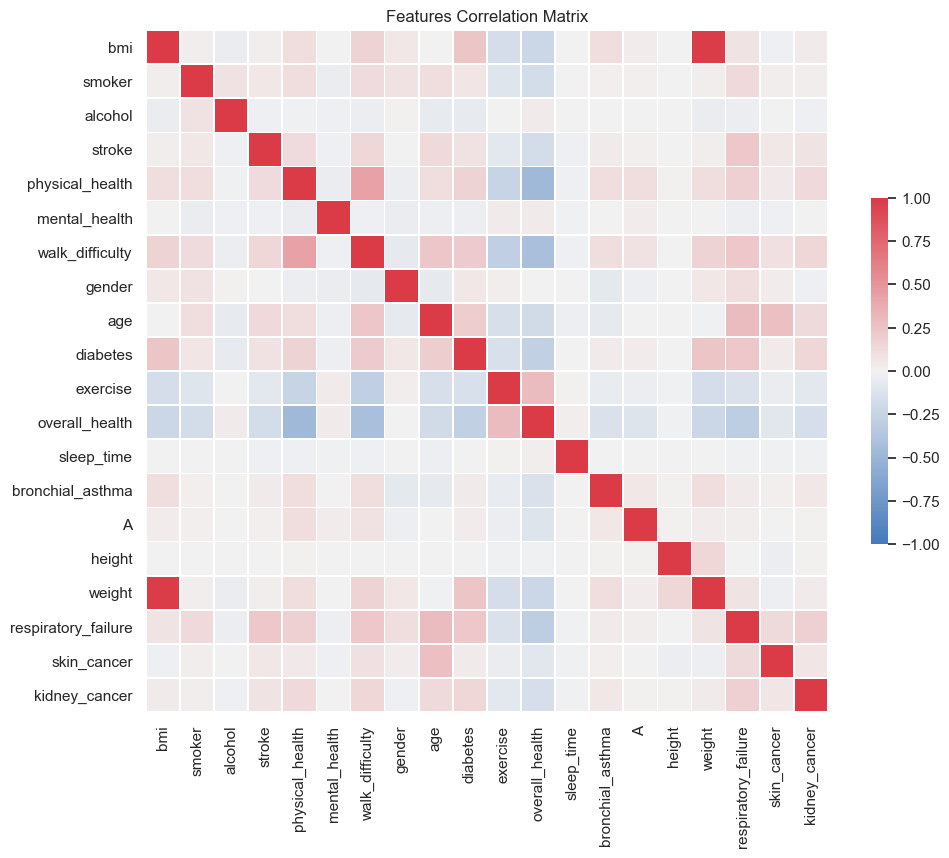

In [833]:
correlation_matrix = df_train.corr()  # Calculate the correlation matrix
plt.figure(figsize=(11, 9))  # Plot the correlation matrix as a heatmap
cmap = sns.diverging_palette(250, 10, as_cmap=True)  # "RdBu" or "RdYlBu"
sns.heatmap(correlation_matrix, cmap=cmap, square=True, center=0, linewidths=0.5, vmin=-1, vmax=1, cbar_kws={"shrink": .5})

plt.title('Features Correlation Matrix')
plt.show()

#### We can see the Weight and bmi are highli correlated

# Visualization methods -  BoxPlots and Crorralation vizualization

### Heatmap Correlation

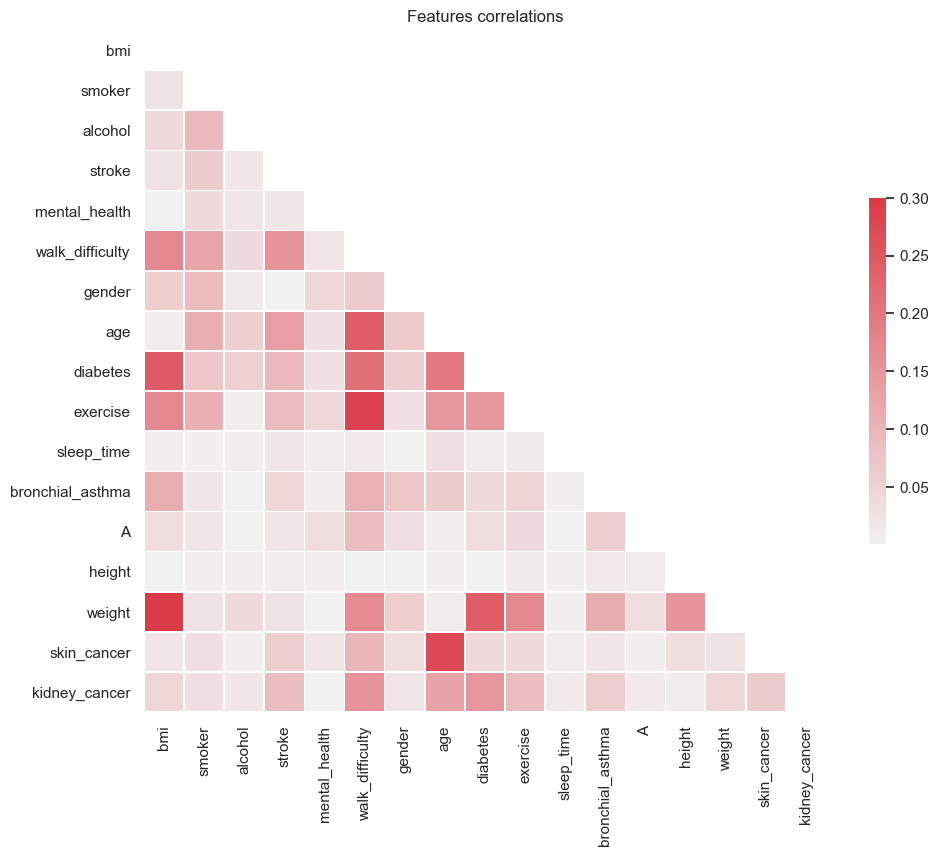

In [834]:
def create_heatmap_correlations(df):
    sns.set(style="white")

    # Compute the correlation matrix
    corr = df.corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr.abs(), mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}).set_title('Features correlations')



create_heatmap_correlations(df_train.select_dtypes(include='float64'))


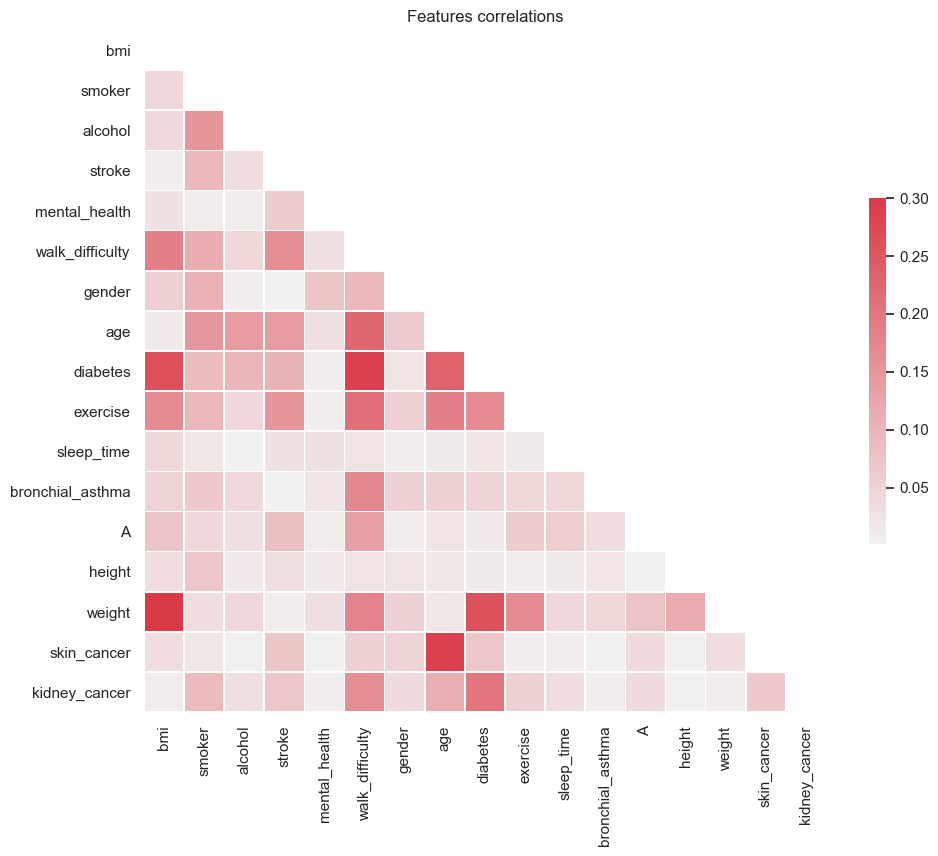

In [835]:
create_heatmap_correlations(df_test.select_dtypes(include='float64'))

In [836]:
def label_dist(df,label_feature_name, figsize=(20,20), title_size=15,add_txt=False, order_x_lst=None):
    sns.set(font_scale = 1)
    feature_list=list(df.columns)
    fig, axs = plt.subplots(math.ceil(len(feature_list)/3), ncols = 3, figsize = figsize)
    for i, feature in enumerate(feature_list):
        if feature == label_feature_name:
            continue
        k = i%3
        j = i//3
        sns.boxplot(x=label_feature_name, y=feature, data=df,showfliers=False, width=0.8, ax=axs[j, k], order=order_x_lst)
        axs[j,k].set_title(f'{feature}', size=title_size)
        axs[j,k].set(ylabel=None)
        axs[j,k].set(xlabel=None)
    plt.tight_layout()
    plt.show()

def corr_dist(df,label_feature_name, figsize=(20,20), title_size=15, to_save=False,add_txt=False, order_x_lst=None):
    sns.set(font_scale = 1.4)
    
    feature_list=list(df[label_feature_name].unique())
#     for feature in feature_list:
#         if ('down_or_shift' in feature) or ('file_name' == feature):
#             feature_list.remove(feature)
    fig, axs = plt.subplots(math.ceil(len(feature_list)/2), ncols = 2, figsize = figsize)
    for i, feature in enumerate(feature_list):
        if feature == label_feature_name:
            continue
        k = i%2
        j = i//2
        corr=df.loc[df[label_feature_name]==feature].corr()
        mask = np.zeros_like(corr)
        mask[np.triu_indices_from(mask)] = True
        mask = 1-mask
        sns.heatmap(corr, 
                xticklabels=corr.columns,
                yticklabels=corr.columns, cmap='coolwarm_r',annot=True,ax=axs[j, k],mask=mask)
        axs[j,k].set_title(f'{feature}', size=title_size)
#         axs[j,k].set(xticklabels=[])
        axs[j,k].set(ylabel=None)
        axs[j,k].set(xlabel=None)
    plt.tight_layout()
    if to_save:
        plt.savefig(to_save)
    plt.show()



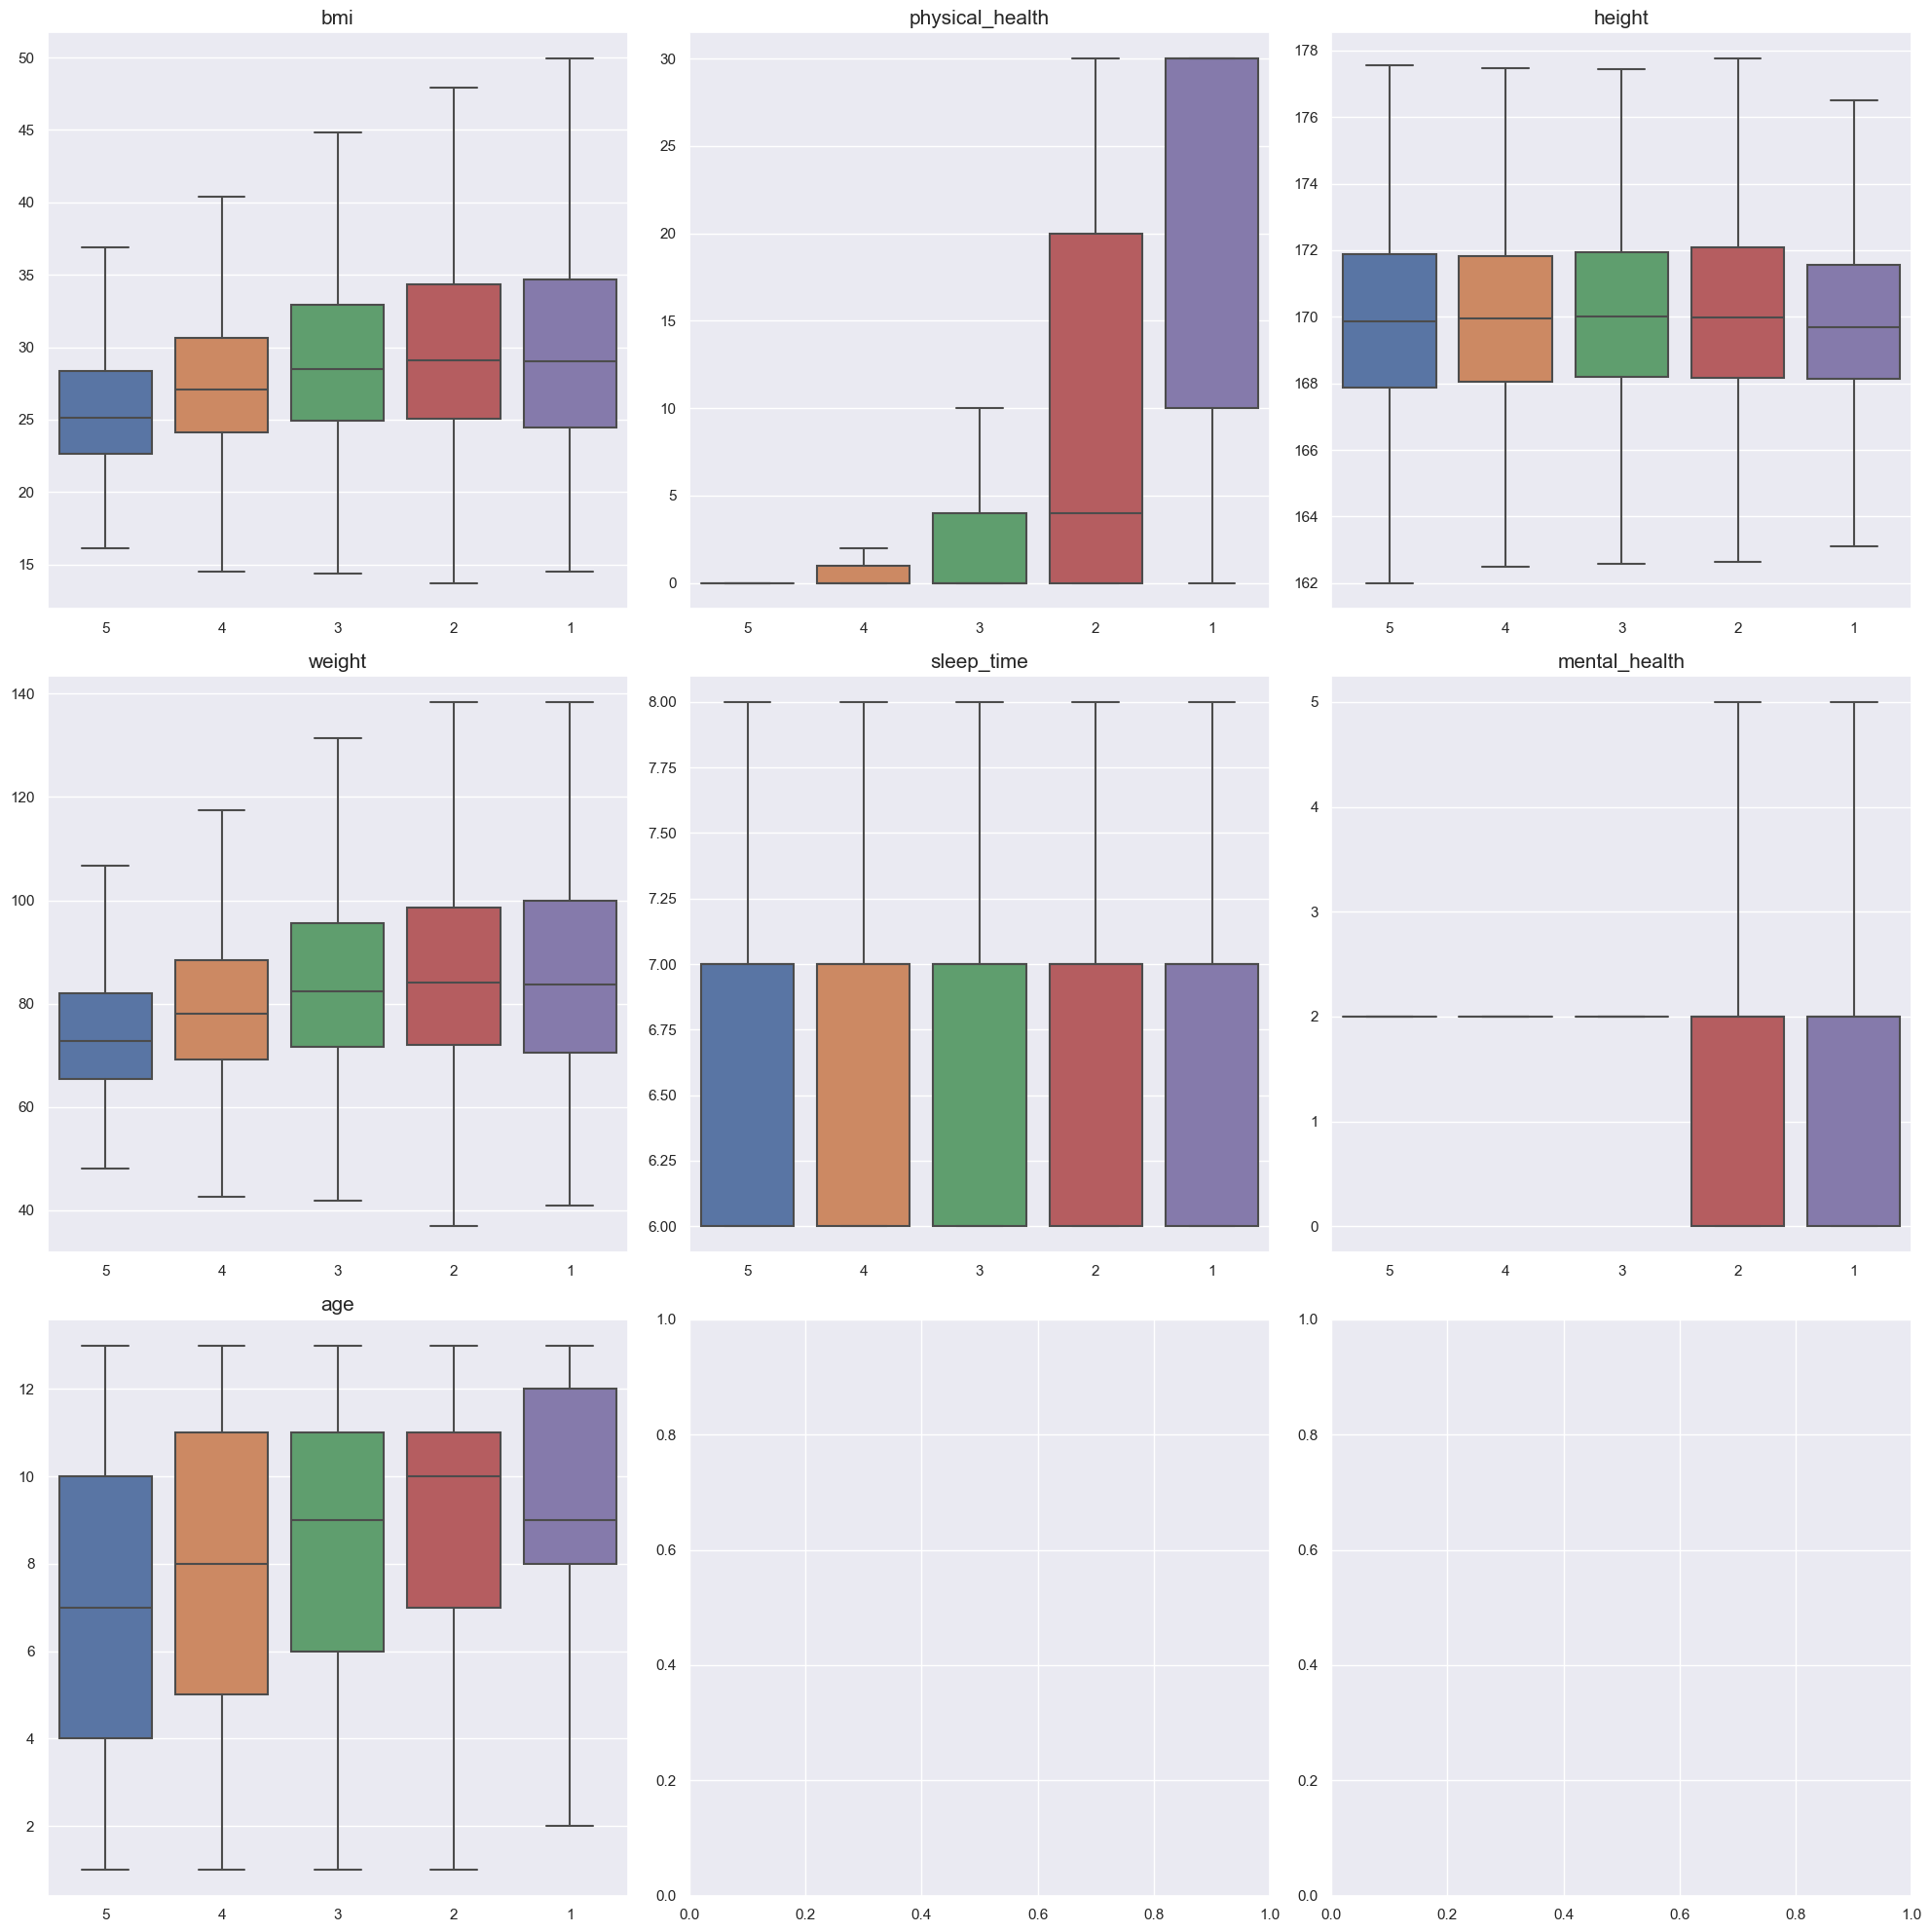

In [837]:
order_x_lst = [5,4,3,2,1]

label_dist(df_train[["bmi","physical_health","height","weight","sleep_time","mental_health","age","overall_health"]],"overall_health",order_x_lst = order_x_lst)

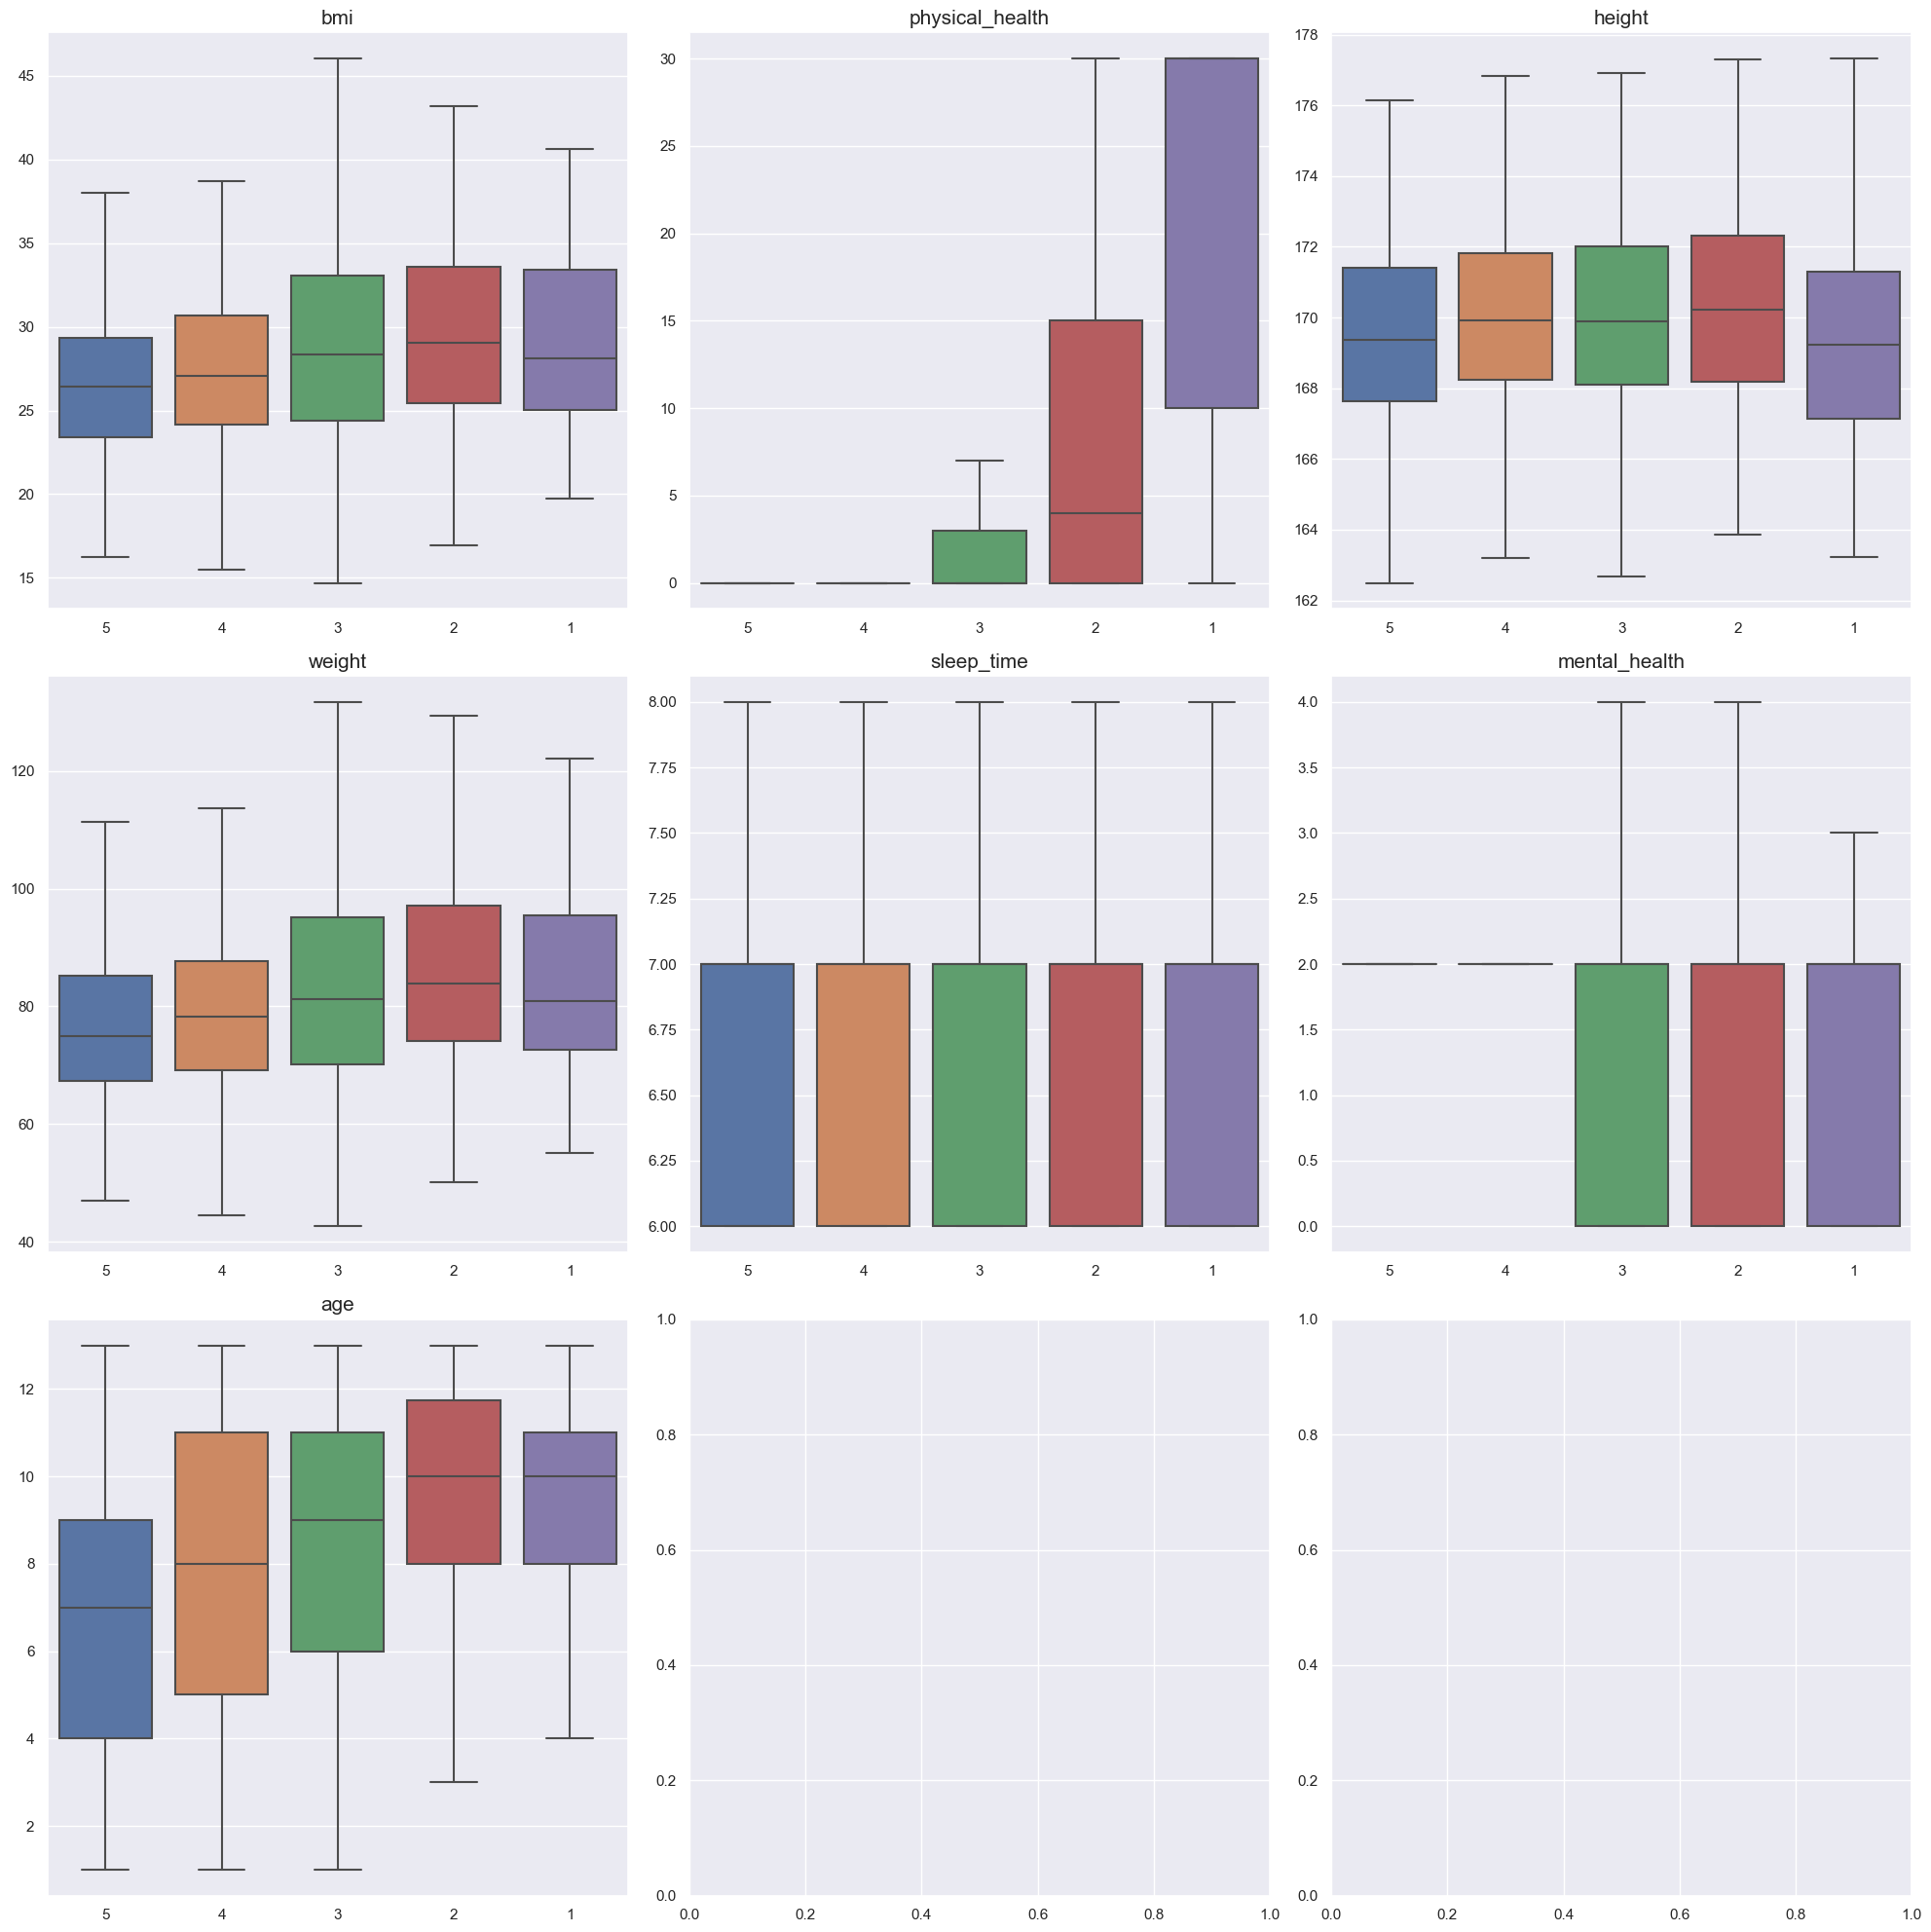

In [838]:
label_dist(df_test[["bmi","physical_health","height","weight","sleep_time","mental_health","age","overall_health"]],"overall_health",order_x_lst = order_x_lst)

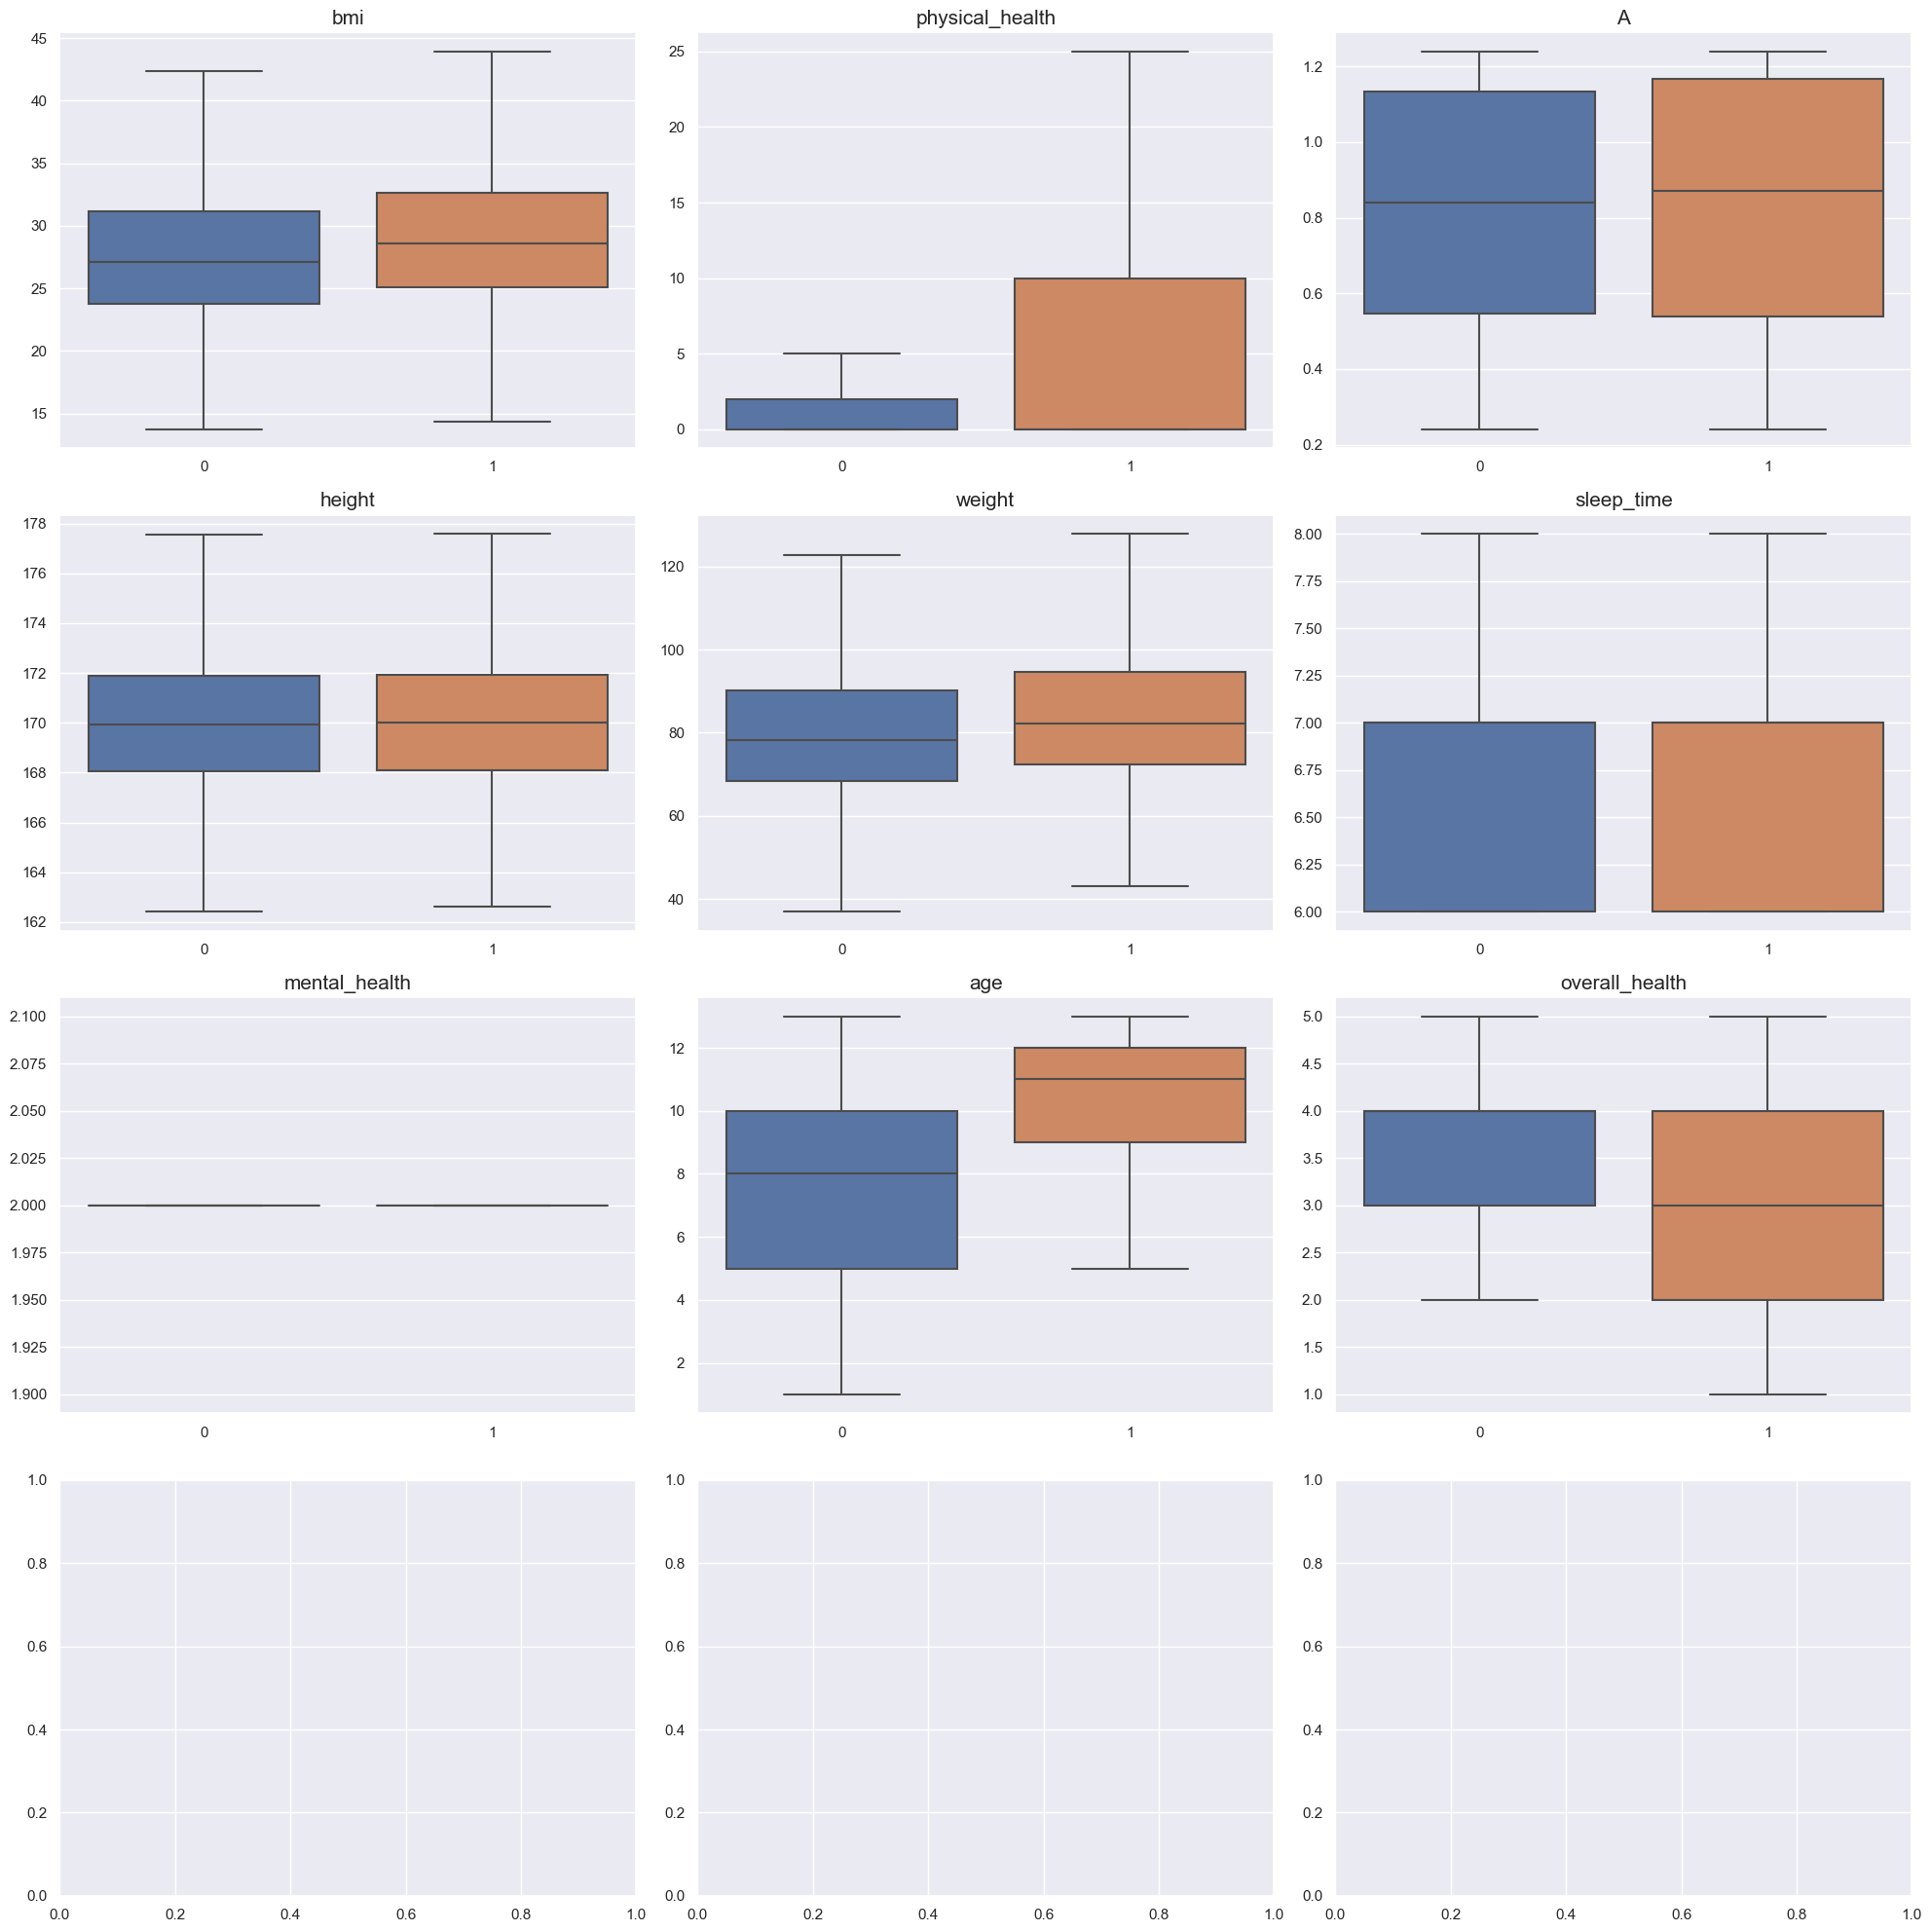

In [839]:
label_dist(df_train[["bmi","physical_health","A","height","weight","sleep_time","mental_health","age","overall_health","respiratory_failure"]],"respiratory_failure")

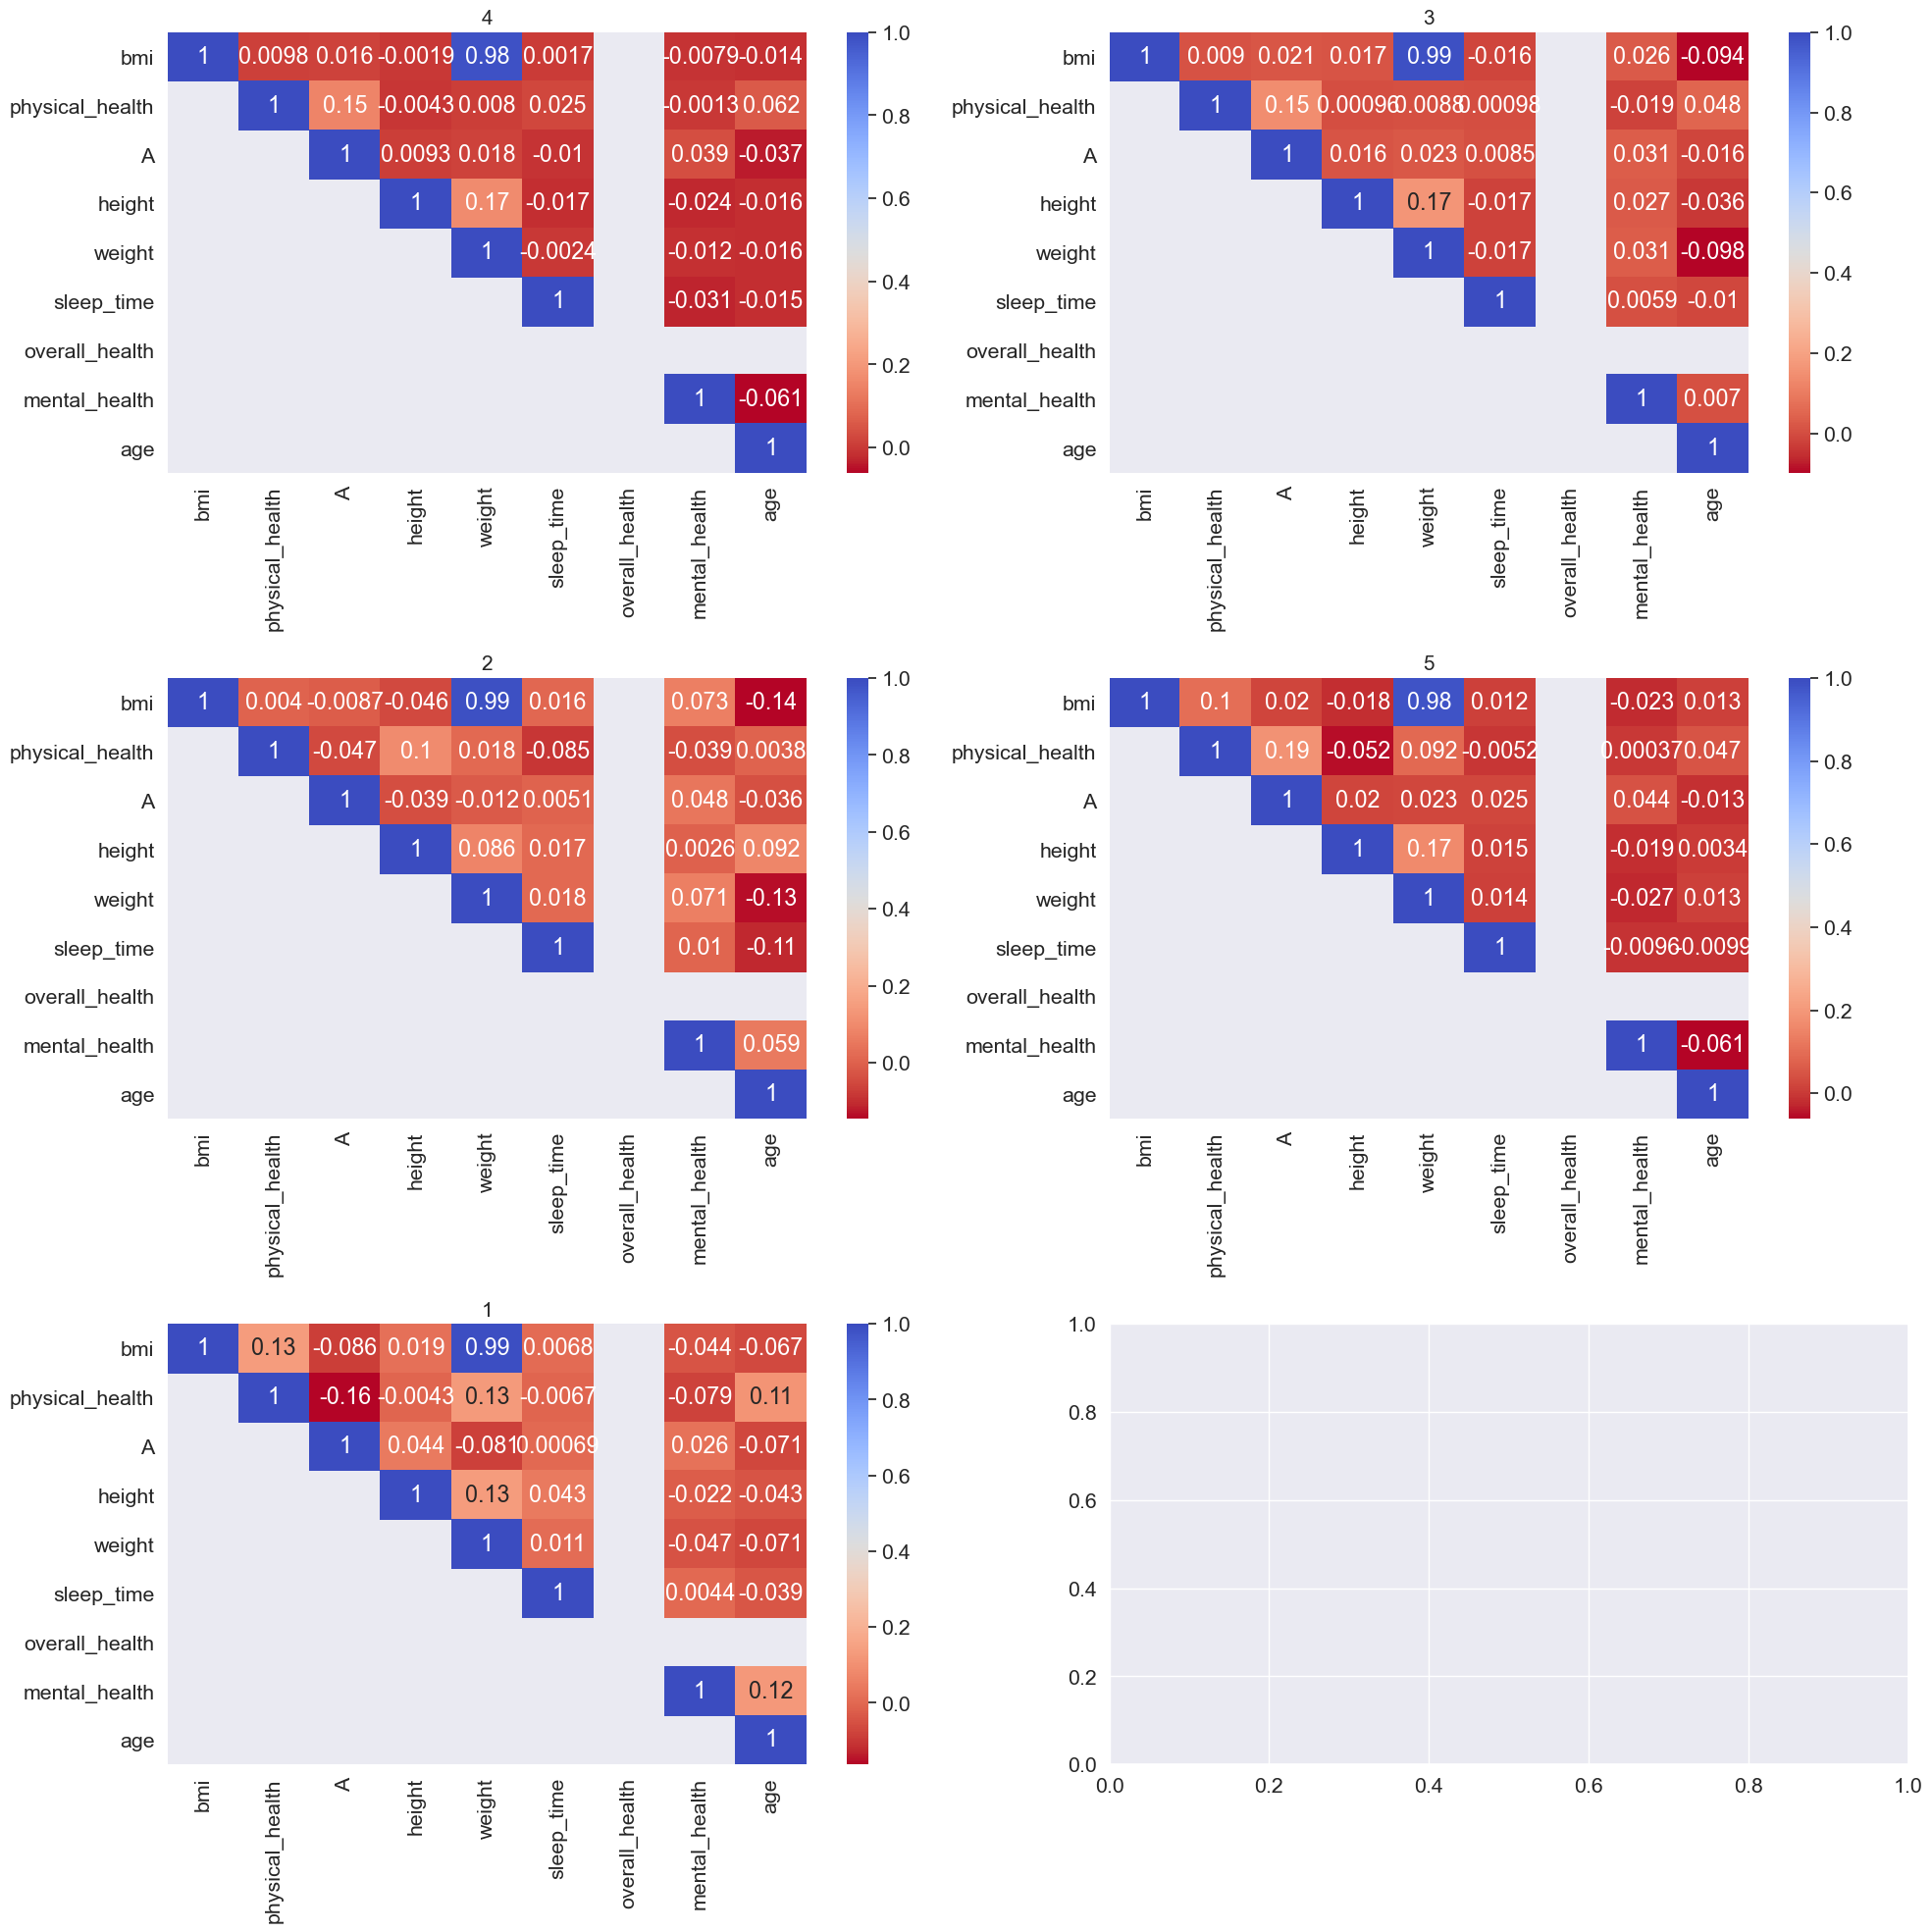

In [840]:
corr_dist(df_train[["bmi","physical_health","A","height","weight","sleep_time","overall_health","mental_health","age"]],"overall_health")

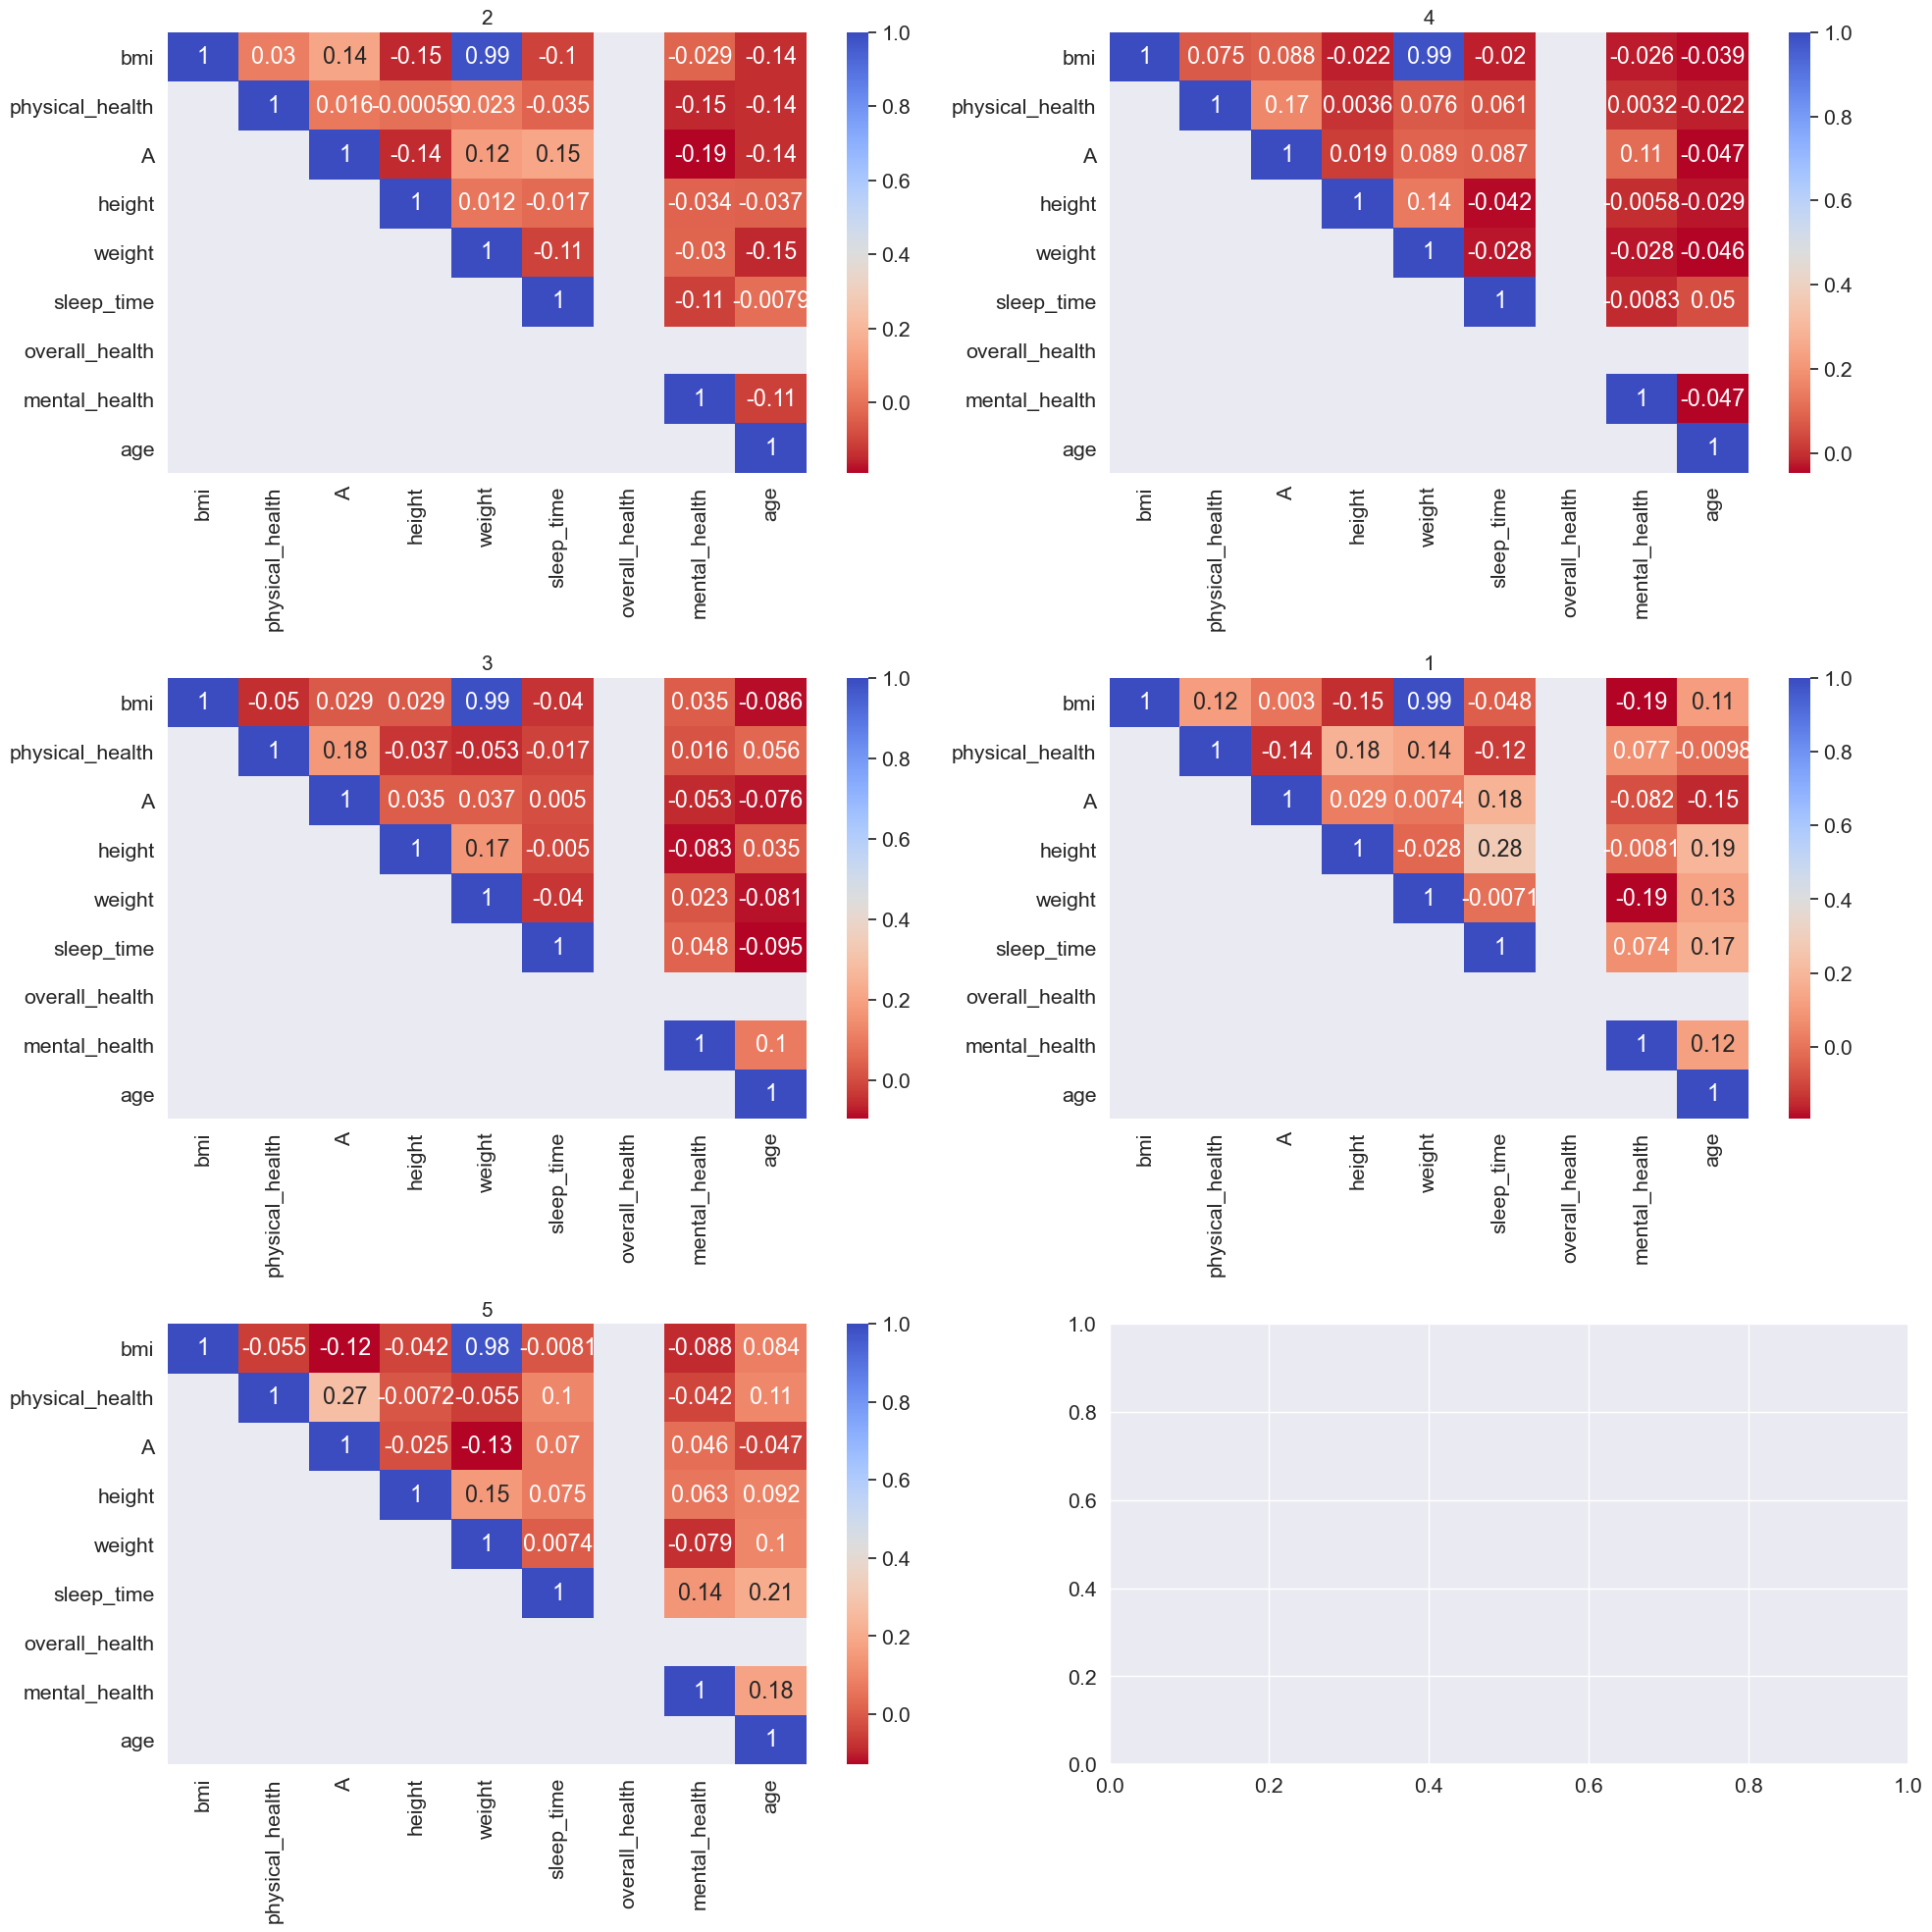

In [841]:
corr_dist(df_test[["bmi","physical_health","A","height","weight","sleep_time","overall_health","mental_health","age"]],"overall_health")

# Distribution of Numeric Columns

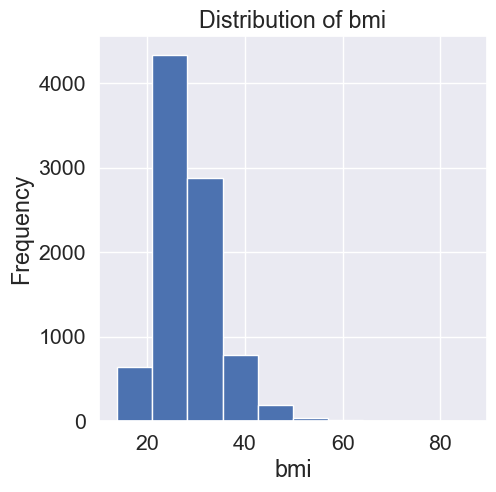

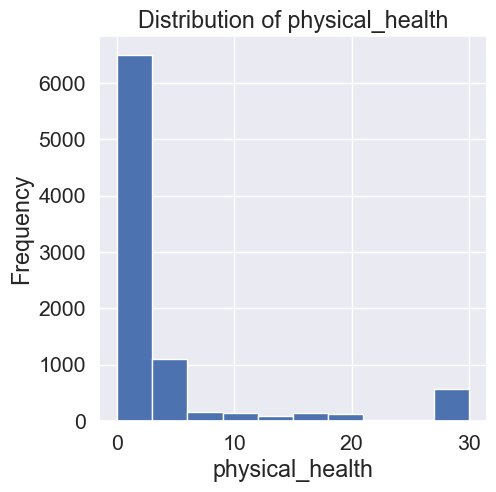

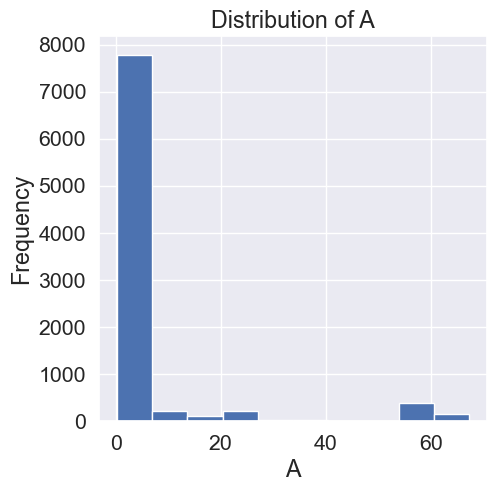

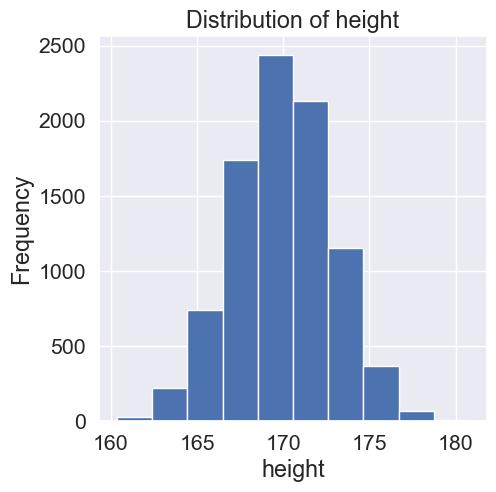

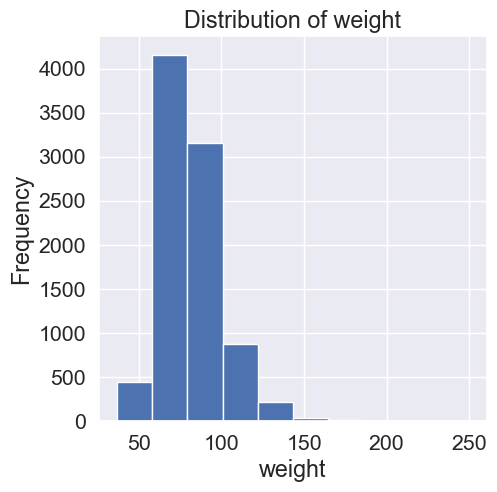

In [842]:
numeric = ["bmi","physical_health","A","height","weight"]
for column in df_train.columns:
    if column in numeric:
        # Create a histogram of the feature's distribution
        plt.figure(figsize=(5,5))
    # Create a new figure for each plot
        plt.hist(df_train[column], bins=10)  # Adjust the number of bins as needed
        plt.xlabel(column)  # Set the x-axis label to the feature name
        plt.ylabel('Frequency')  # Set the y-axis label
        plt.title(f'Distribution of {column}')  # Set the plot title

    # Display the plots
    plt.show()

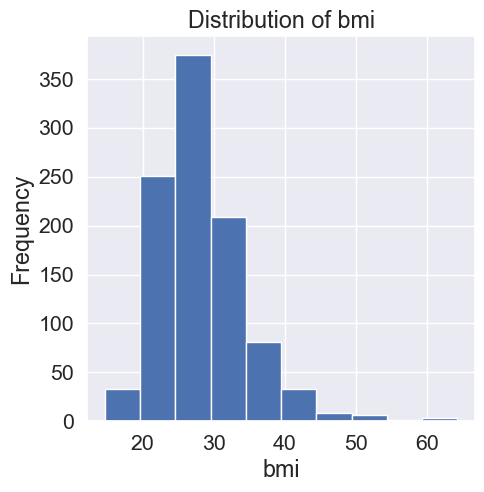

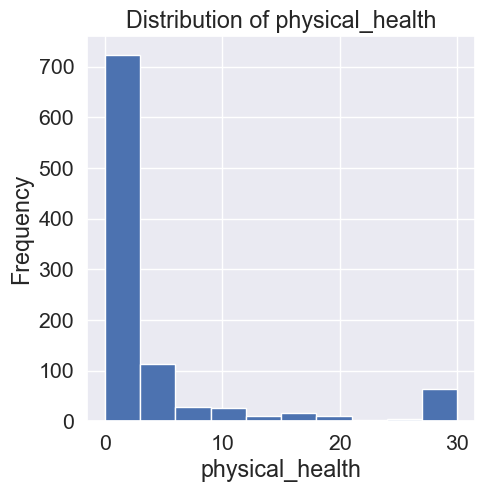

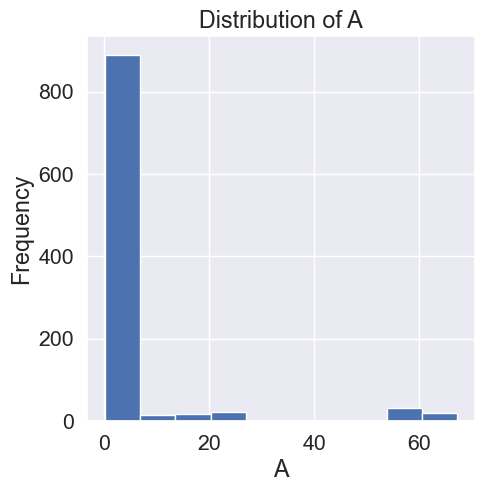

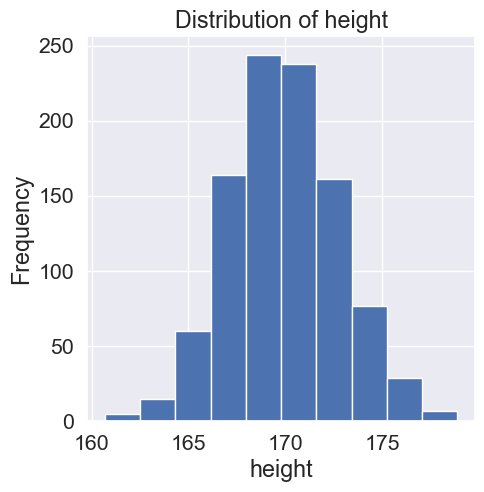

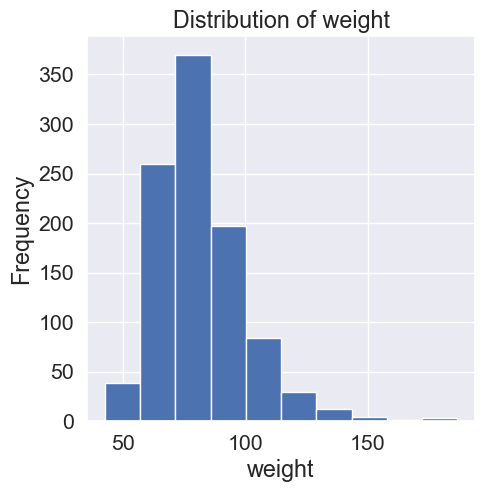

In [843]:
for column in df_test.columns:
    if column in numeric:
        # Create a histogram of the feature's distribution
        plt.figure(figsize=(5,5))
    # Create a new figure for each plot
        plt.hist(df_test[column], bins=10)  # Adjust the number of bins as needed
        plt.xlabel(column)  # Set the x-axis label to the feature name
        plt.ylabel('Frequency')  # Set the y-axis label
        plt.title(f'Distribution of {column}')  # Set the plot title

    # Display the plots
    plt.show()

# Conclusion

### Histogram of Categorical Features

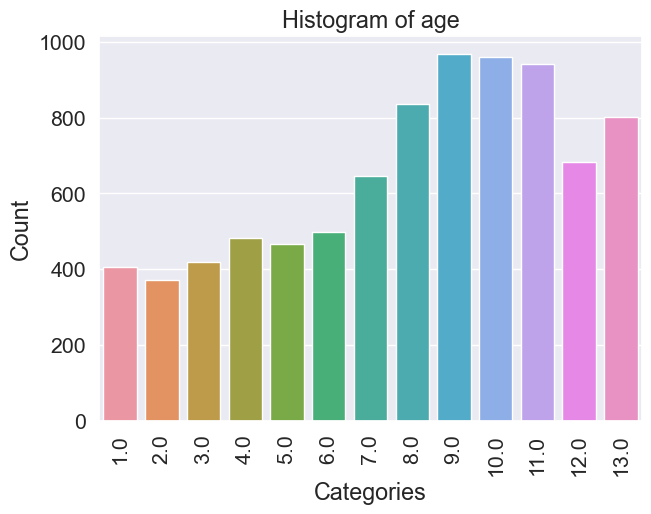

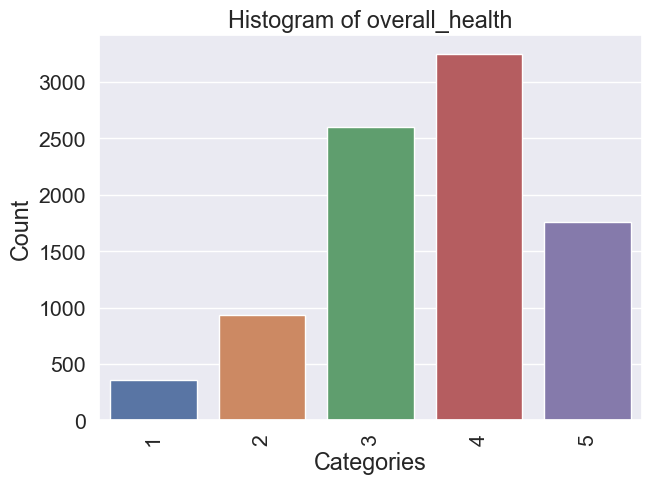

In [844]:
categorical_features = ['age', 'overall_health']  # List of categorical feature column names

for feature in categorical_features:
    plt.figure(figsize=(7, 5))  
    sns.countplot(x=feature, data=df_train) 
    plt.title(f'Histogram of {feature}')  
    plt.xlabel('Categories')  
    plt.ylabel('Count') 
    plt.xticks(rotation=90)  
    plt.show() 

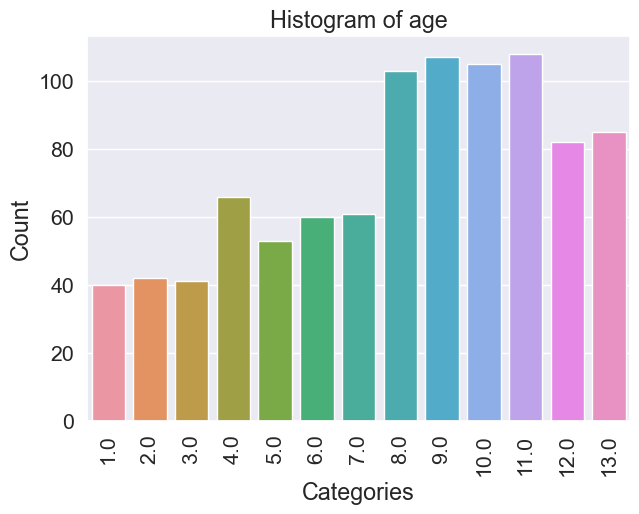

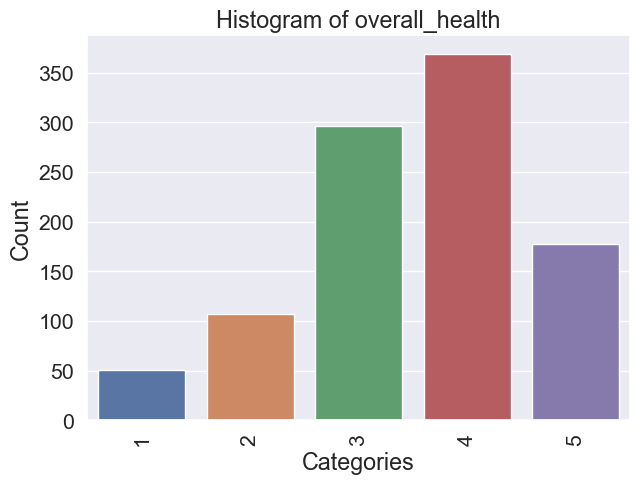

In [845]:
categorical_features = ['age', 'overall_health']  # List of categorical feature column names

for feature in categorical_features:
    plt.figure(figsize=(7, 5))  
    sns.countplot(x=feature, data=df_test) 
    plt.title(f'Histogram of {feature}')  
    plt.xlabel('Categories')  
    plt.ylabel('Count') 
    plt.xticks(rotation=90)  
    plt.show() 

### conclusions:

#### 1. BMI is corrrleted with poor overall health and weight feature
#### 2. physical health is correlated with overall health 
#### 3. Sleep time has some correlationwith overall health
#### 4. Height is not related to overall health
#### 5. Overall health is influential on the label.
#### 6. Sleep time is not influential the label. 
#### 7. we can't find feature 'A' to be influential the label, there is some differnce between sick people and heathy people. There seems to be some sort of correlation between the A column and physical health. Seems like when the overall health is poor its a negative correlation and when its excellent its a positive correlation. 
#### 8. Height is not influential the label.
#### 9. Weight is not influential the label.
#### 10. Age seems to be a major influential on the label.

# Pre-Processing

## Outliers Handling

In [846]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
bmi,8902.0,28.240356,6.178302,13.730000,24.030000,27.290000,31.320000,85.910000
smoker,8491.0,0.444000,0.496883,0.000000,0.000000,0.000000,1.000000,1.000000
alcohol,8382.0,0.069435,0.254207,0.000000,0.000000,0.000000,0.000000,1.000000
stroke,8593.0,0.046666,0.210935,0.000000,0.000000,0.000000,0.000000,1.000000
physical_health,8902.0,3.630869,7.971462,0.000000,0.000000,0.000000,3.000000,30.000000
mental_health,8902.0,2.969220,4.370823,0.000000,2.000000,2.000000,2.000000,30.000000
walk_difficulty,8419.0,0.147761,0.354884,0.000000,0.000000,0.000000,0.000000,1.000000
gender,8608.0,0.490706,0.499943,0.000000,0.000000,0.000000,1.000000,1.000000
age,8477.0,8.039637,3.476013,1.000000,5.000000,9.000000,11.000000,13.000000
diabetes,8567.0,0.140306,0.347324,0.000000,0.000000,0.000000,0.000000,1.000000


In [847]:
sick = df_train[df_train['respiratory_failure'] == 1].copy()
healthy = df_train[df_train['respiratory_failure'] == 0].copy()
# Compute the descriptive statistics of 'column_y' in the subset
sick.describe().T

,count,mean,std,min,25%,50%,75%,max
bmi,1341.0,29.424415,6.231900,14.370000,25.090000,28.590000,32.640000,62.390000
smoker,1302.0,0.600614,0.489960,0.000000,0.000000,1.000000,1.000000,1.000000
alcohol,1257.0,0.048528,0.214965,0.000000,0.000000,0.000000,0.000000,1.000000
stroke,1301.0,0.159877,0.366633,0.000000,0.000000,0.000000,0.000000,1.000000
physical_health,1341.0,7.112603,10.975957,0.000000,0.000000,0.000000,10.000000,30.000000
mental_health,1341.0,2.698732,3.759792,0.000000,2.000000,2.000000,2.000000,20.000000
walk_difficulty,1263.0,0.343626,0.475106,0.000000,0.000000,0.000000,1.000000,1.000000
gender,1289.0,0.626843,0.483831,0.000000,0.000000,1.000000,1.000000,1.000000
age,1280.0,10.441406,2.231974,1.000000,9.000000,11.000000,12.000000,13.000000
diabetes,1293.0,0.331013,0.470760,0.000000,0.000000,0.000000,1.000000,1.000000


In [848]:
healthy.describe().T

,count,mean,std,min,25%,50%,75%,max
bmi,7561.0,28.030354,6.145386,13.730000,23.750000,27.120000,31.190000,85.910000
smoker,7189.0,0.415635,0.492865,0.000000,0.000000,0.000000,1.000000,1.000000
alcohol,7125.0,0.073123,0.260356,0.000000,0.000000,0.000000,0.000000,1.000000
stroke,7292.0,0.026467,0.160532,0.000000,0.000000,0.000000,0.000000,1.000000
physical_health,7561.0,3.013358,7.136571,0.000000,0.000000,0.000000,2.000000,30.000000
mental_health,7561.0,3.017193,4.468996,0.000000,2.000000,2.000000,2.000000,30.000000
walk_difficulty,7156.0,0.113192,0.316849,0.000000,0.000000,0.000000,0.000000,1.000000
gender,7319.0,0.466730,0.498926,0.000000,0.000000,0.000000,1.000000,1.000000
age,7197.0,7.612477,3.483946,1.000000,5.000000,8.000000,10.000000,13.000000
diabetes,7274.0,0.106406,0.308378,0.000000,0.000000,0.000000,0.000000,1.000000


# bmi Outline detection

<AxesSubplot:>

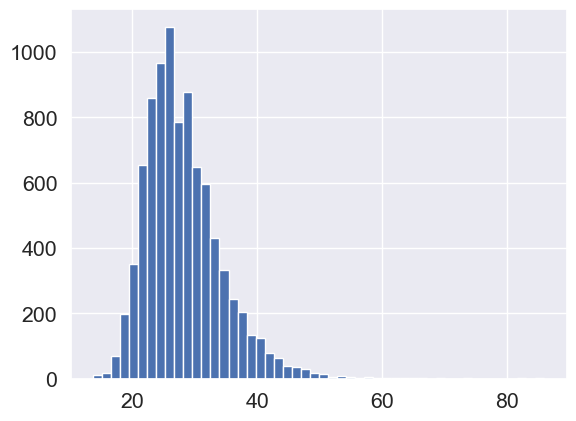

In [849]:
df_train.bmi.hist(bins=50)

<AxesSubplot:>

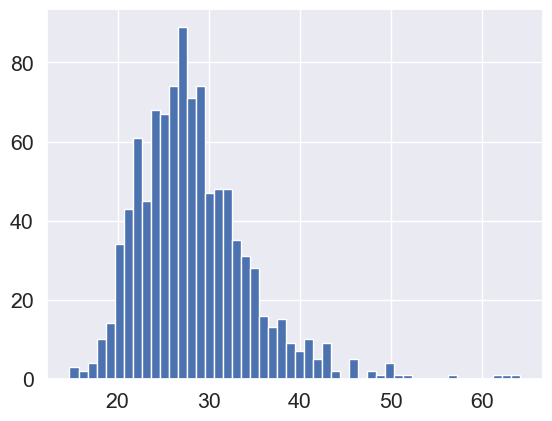

In [850]:
df_test.bmi.hist(bins=50)

In [851]:
df_train.isna().sum()

bmi                      0
smoker                 411
alcohol                520
stroke                 309
physical_health          0
mental_health            0
walk_difficulty        483
gender                 294
age                    425
diabetes               335
exercise               523
overall_health           0
sleep_time               0
bronchial_asthma       269
A                        0
height                   0
weight                   0
respiratory_failure      0
skin_cancer            566
kidney_cancer          566
dtype: int64

In [852]:
df_test.isna().sum()

bmi                  0
smoker              62
alcohol             61
stroke              42
physical_health      0
mental_health        0
walk_difficulty     41
gender              41
age                 47
diabetes            46
exercise            65
overall_health       0
sleep_time           0
bronchial_asthma    34
A                    0
height               0
weight               0
skin_cancer         71
kidney_cancer       71
dtype: int64

## 'A' Column

<AxesSubplot:>

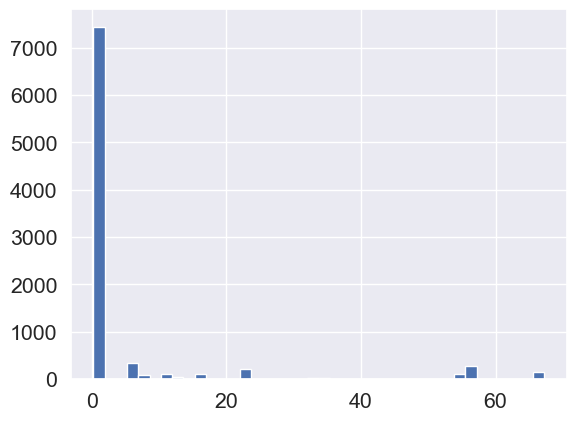

In [853]:
df_train.A.hist(bins=40)

<AxesSubplot:xlabel='A', ylabel='Count'>

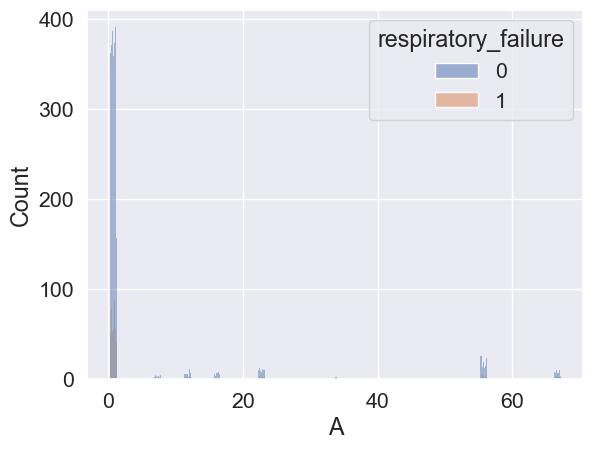

In [854]:
import seaborn as sns
sns.histplot(df_train.loc[df_train["A"]>0], x = "A", hue="respiratory_failure")

## Deleting rows with more than 20% missing columns

In [855]:
print(f"Old shape:{df_train.shape}")
df_train=df_train.dropna(thresh=round(df_train.shape[1]*8/10))
print(f"shape after deleting rows with more than 20% of the columns missing:{df_train.shape}")

Old shape:(8902, 20)
shape after deleting rows with more than 20% of the columns missing:(8902, 20)


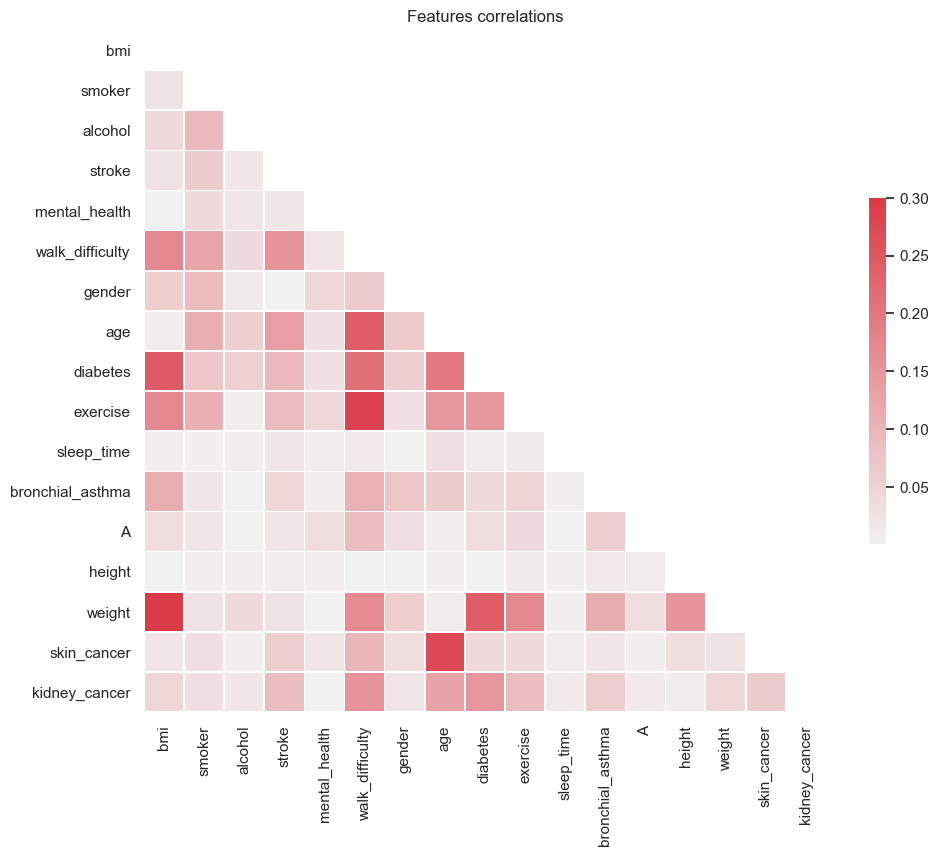

In [856]:
create_heatmap_correlations(df_train.select_dtypes(include='float64'))

## Handeling Missing Values in Categorial Columns - using proportion 

In [857]:
categorical_cols = ["skin_cancer","kidney_cancer", "bronchial_asthma","walk_difficulty","smoker","alcohol","stroke", "gender","diabetes","exercise"]
for col in categorical_cols:
    proportion_1 = df_train[col].sum() / len(df_train)
    proportion_0 = 1 - proportion_1
    
    # Count the number of missing values
    missing_count = df_train[col].isnull().sum()
    
    # Generate random values based on the proportion
    random_values = np.random.choice([0, 1], size=missing_count, p=[proportion_0, proportion_1])
    
    # Assign random values to missing values
    df_train.loc[df_train[col].isnull(), col] = random_values

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8902 entries, 0 to 8901
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bmi                  8902 non-null   float64
 1   smoker               8902 non-null   float64
 2   alcohol              8902 non-null   float64
 3   stroke               8902 non-null   float64
 4   physical_health      8902 non-null   Int64  
 5   mental_health        8902 non-null   float64
 6   walk_difficulty      8902 non-null   float64
 7   gender               8902 non-null   float64
 8   age                  8477 non-null   float64
 9   diabetes             8902 non-null   float64
 10  exercise             8902 non-null   float64
 11  overall_health       8902 non-null   int64  
 12  sleep_time           8902 non-null   float64
 13  bronchial_asthma     8902 non-null   float64
 14  A                    8902 non-null   float64
 15  height               8902 non-null   f

In [858]:
categorical_cols = ["skin_cancer","kidney_cancer", "bronchial_asthma","walk_difficulty","smoker","alcohol","stroke", "gender","diabetes","exercise"]
for col in categorical_cols:
    proportion_1 = df_test[col].sum() / len(df_test)
    proportion_0 = 1 - proportion_1
    
    # Count the number of missing values
    missing_count = df_test[col].isnull().sum()
    
    # Generate random values based on the proportion
    random_values = np.random.choice([0, 1], size=missing_count, p=[proportion_0, proportion_1])
    
    # Assign random values to missing values
    df_test.loc[df_test[col].isnull(), col] = random_values

df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bmi               1000 non-null   float64
 1   smoker            1000 non-null   float64
 2   alcohol           1000 non-null   float64
 3   stroke            1000 non-null   float64
 4   physical_health   1000 non-null   Int64  
 5   mental_health     1000 non-null   float64
 6   walk_difficulty   1000 non-null   float64
 7   gender            1000 non-null   float64
 8   age               953 non-null    float64
 9   diabetes          1000 non-null   float64
 10  exercise          1000 non-null   float64
 11  overall_health    1000 non-null   int64  
 12  sleep_time        1000 non-null   float64
 13  bronchial_asthma  1000 non-null   float64
 14  A                 1000 non-null   float64
 15  height            1000 non-null   float64
 16  weight            1000 non-null   float64
 

### Handeling age nulls with KNN

In [859]:
df_train['age'] = imputer.fit_transform(df_train[['age']])

In [860]:
df_train.isna().sum()

bmi                    0
smoker                 0
alcohol                0
stroke                 0
physical_health        0
mental_health          0
walk_difficulty        0
gender                 0
age                    0
diabetes               0
exercise               0
overall_health         0
sleep_time             0
bronchial_asthma       0
A                      0
height                 0
weight                 0
respiratory_failure    0
skin_cancer            0
kidney_cancer          0
dtype: int64

In [861]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8902 entries, 0 to 8901
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bmi                  8902 non-null   float64
 1   smoker               8902 non-null   float64
 2   alcohol              8902 non-null   float64
 3   stroke               8902 non-null   float64
 4   physical_health      8902 non-null   Int64  
 5   mental_health        8902 non-null   float64
 6   walk_difficulty      8902 non-null   float64
 7   gender               8902 non-null   float64
 8   age                  8902 non-null   float64
 9   diabetes             8902 non-null   float64
 10  exercise             8902 non-null   float64
 11  overall_health       8902 non-null   int64  
 12  sleep_time           8902 non-null   float64
 13  bronchial_asthma     8902 non-null   float64
 14  A                    8902 non-null   float64
 15  height               8902 non-null   f

In [862]:
df_test['age'] = imputer.fit_transform(df_test[['age']])

In [863]:
df_test.isna().sum()

bmi                 0
smoker              0
alcohol             0
stroke              0
physical_health     0
mental_health       0
walk_difficulty     0
gender              0
age                 0
diabetes            0
exercise            0
overall_health      0
sleep_time          0
bronchial_asthma    0
A                   0
height              0
weight              0
skin_cancer         0
kidney_cancer       0
dtype: int64

In [864]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bmi               1000 non-null   float64
 1   smoker            1000 non-null   float64
 2   alcohol           1000 non-null   float64
 3   stroke            1000 non-null   float64
 4   physical_health   1000 non-null   Int64  
 5   mental_health     1000 non-null   float64
 6   walk_difficulty   1000 non-null   float64
 7   gender            1000 non-null   float64
 8   age               1000 non-null   float64
 9   diabetes          1000 non-null   float64
 10  exercise          1000 non-null   float64
 11  overall_health    1000 non-null   int64  
 12  sleep_time        1000 non-null   float64
 13  bronchial_asthma  1000 non-null   float64
 14  A                 1000 non-null   float64
 15  height            1000 non-null   float64
 16  weight            1000 non-null   float64
 

## Data Scaling 

### Min Max Scaling

In [865]:
feature_list=['bmi', 'height', 'weight','A', 'overall_health','sleep_time','mental_health','physical_health','age']
scaler = MinMaxScaler()
df_scaled_train = df_train.copy()
df_scaled_test = df_test.copy()
# Apply Min-Max scaling to the selected columns,
df_scaled_train[feature_list] = scaler.fit_transform(df_scaled_train[feature_list])
df_scaled_test[feature_list] = scaler.fit_transform(df_scaled_test[feature_list])

In [866]:
df_scaled_train.describe().T

,count,mean,std,min,25%,50%,75%,max
bmi,8902.0,0.201030,0.085596,0.0,0.142699,0.187864,0.243696,1.0
smoker,8902.0,0.443047,0.496774,0.0,0.000000,0.000000,1.000000,1.0
alcohol,8902.0,0.069310,0.253995,0.0,0.000000,0.000000,0.000000,1.0
stroke,8902.0,0.047517,0.212755,0.0,0.000000,0.000000,0.000000,1.0
physical_health,8902.0,0.121029,0.265715,0.0,0.000000,0.000000,0.100000,1.0
mental_health,8902.0,0.098974,0.145694,0.0,0.066667,0.066667,0.066667,1.0
walk_difficulty,8902.0,0.146821,0.353947,0.0,0.000000,0.000000,0.000000,1.0
gender,8902.0,0.490564,0.499939,0.0,0.000000,0.000000,1.000000,1.0
age,8902.0,0.586636,0.282668,0.0,0.416667,0.586636,0.833333,1.0
diabetes,8902.0,0.139519,0.346507,0.0,0.000000,0.000000,0.000000,1.0


In [867]:
df_scaled_test.describe().T

,count,mean,std,min,25%,50%,75%,max
bmi,1000.0,0.274659,0.125141,0.0,0.191349,0.257218,0.335554,1.0
smoker,1000.0,0.463000,0.498879,0.0,0.000000,0.000000,1.000000,1.0
alcohol,1000.0,0.098000,0.297463,0.0,0.000000,0.000000,0.000000,1.0
stroke,1000.0,0.044000,0.205198,0.0,0.000000,0.000000,0.000000,1.0
physical_health,1000.0,0.122167,0.265418,0.0,0.000000,0.000000,0.133333,1.0
mental_health,1000.0,0.148050,0.226053,0.0,0.100000,0.100000,0.100000,1.0
walk_difficulty,1000.0,0.155000,0.362086,0.0,0.000000,0.000000,0.000000,1.0
gender,1000.0,0.490000,0.500150,0.0,0.000000,0.000000,1.000000,1.0
age,1000.0,0.587968,0.279823,0.0,0.416667,0.587968,0.833333,1.0
diabetes,1000.0,0.139000,0.346120,0.0,0.000000,0.000000,0.000000,1.0


## Feature engineering

### Itertools 

In [868]:
df_train_interaction = df_scaled_train.copy()
df_test_interaction = df_scaled_test.copy()
df_train_interaction = df_train_interaction.drop('respiratory_failure', axis=1)

In [869]:
# Initialize an empty DataFrame to store the product columns
product_data = pd.DataFrame()

# Set the maximum combination size you want to consider
max_comb_size = 2

# Iterate through different combination sizes
for size in range(2, max_comb_size + 1):
    # Generate all combinations of columns of the given size
    column_combinations = combinations(df_train_interaction.columns, size)
    
    # Iterate through each combination
    for combination in column_combinations:
        # Calculate the product of the selected columns
        product = df_train_interaction[list(combination)].product(axis=1)
        
        # Assign the product column to the new DataFrame with a suitable name
        column_name = '_'.join(combination) + '_product'
        product_data[column_name] = product
        
# Concatenate the original data with the product columns
df_train_iter = pd.concat([df_train_interaction, product_data], axis=1)

#result.head()

#----------------------------------------------------------------------------------------------------------------------#

#Test DF

# Initialize an empty DataFrame to store the product columns
product_data = pd.DataFrame()

# Set the maximum combination size you want to consider
max_comb_size = 2

# Iterate through different combination sizes
for size in range(2, max_comb_size + 1):
    # Generate all combinations of columns of the given size
    column_combinations = combinations(df_test_interaction.columns, size)
    
    # Iterate through each combination
    for combination in column_combinations:
        # Calculate the product of the selected columns
        product = df_test_interaction[list(combination)].product(axis=1)
        
        # Assign the product column to the new DataFrame with a suitable name
        column_name = '_'.join(combination) + '_product'
        product_data[column_name] = product
        
# Concatenate the original data with the product columns
df_test_iter = pd.concat([df_test_interaction, product_data], axis=1)

In [870]:
df_train_iter.describe().T

,count,mean,std,min,25%,50%,75%,max
bmi,8902.0,0.201030,0.085596,0.0,0.142699,0.187864,0.243696,1.000000
smoker,8902.0,0.443047,0.496774,0.0,0.000000,0.000000,1.000000,1.000000
alcohol,8902.0,0.069310,0.253995,0.0,0.000000,0.000000,0.000000,1.000000
stroke,8902.0,0.047517,0.212755,0.0,0.000000,0.000000,0.000000,1.000000
physical_health,8902.0,0.121029,0.265715,0.0,0.000000,0.000000,0.100000,1.000000
...,...,...,...,...,...,...,...,...
height_skin_cancer_product,8902.0,0.053752,0.154749,0.0,0.000000,0.000000,0.000000,0.926464
height_kidney_cancer_product,8902.0,0.021506,0.102847,0.0,0.000000,0.000000,0.000000,0.926464
weight_skin_cancer_product,8902.0,0.023780,0.070414,0.0,0.000000,0.000000,0.000000,0.622080
weight_kidney_cancer_product,8902.0,0.010295,0.050843,0.0,0.000000,0.000000,0.000000,0.542588


### Polinomial

In [871]:
# Create an instance of PolynomialFeatures
poly = PolynomialFeatures(degree=2)

poly_train_data = df_scaled_train.copy()
poly_train_data = poly_train_data.drop('respiratory_failure', axis=1)
poly_test_data = df_scaled_test.copy()

# Fit and transform the DataFrame
df_train_poly = poly.fit_transform(poly_train_data)
df_test_poly = poly.fit_transform(poly_test_data)
# Create a new DataFrame with the polynomial features
df_train_poly = pd.DataFrame(df_train_poly, columns=poly.get_feature_names_out(poly_test_data.columns.tolist()))
df_test_poly = pd.DataFrame(df_test_poly, columns=poly.get_feature_names_out(poly_test_data.columns.tolist()))

In [872]:
df_train_poly.describe().T

,count,mean,std,min,25%,50%,75%,max
1,8902.0,1.000000,0.000000,1.0,1.000000,1.000000,1.000000,1.000000
bmi,8902.0,0.201030,0.085596,0.0,0.142699,0.187864,0.243696,1.000000
smoker,8902.0,0.443047,0.496774,0.0,0.000000,0.000000,1.000000,1.000000
alcohol,8902.0,0.069310,0.253995,0.0,0.000000,0.000000,0.000000,1.000000
stroke,8902.0,0.047517,0.212755,0.0,0.000000,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...
weight skin_cancer,8902.0,0.023780,0.070414,0.0,0.000000,0.000000,0.000000,0.622080
weight kidney_cancer,8902.0,0.010295,0.050843,0.0,0.000000,0.000000,0.000000,0.542588
skin_cancer^2,8902.0,0.117052,0.321501,0.0,0.000000,0.000000,0.000000,1.000000
skin_cancer kidney_cancer,8902.0,0.008987,0.094377,0.0,0.000000,0.000000,0.000000,1.000000


In [873]:
df_test_poly.describe().T

,count,mean,std,min,25%,50%,75%,max
1,1000.0,1.000000,0.000000,1.0,1.000000,1.000000,1.000000,1.000000
bmi,1000.0,0.274659,0.125141,0.0,0.191349,0.257218,0.335554,1.000000
smoker,1000.0,0.463000,0.498879,0.0,0.000000,0.000000,1.000000,1.000000
alcohol,1000.0,0.098000,0.297463,0.0,0.000000,0.000000,0.000000,1.000000
stroke,1000.0,0.044000,0.205198,0.0,0.000000,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...
weight skin_cancer,1000.0,0.033369,0.093935,0.0,0.000000,0.000000,0.000000,0.619025
weight kidney_cancer,1000.0,0.011548,0.061200,0.0,0.000000,0.000000,0.000000,0.654721
skin_cancer^2,1000.0,0.131000,0.337569,0.0,0.000000,0.000000,0.000000,1.000000
skin_cancer kidney_cancer,1000.0,0.010000,0.099549,0.0,0.000000,0.000000,0.000000,1.000000


# Dimension Reduction

## PCA

### Iter - top n features

Explained Variance Ratio: [1.48581083e-01 1.26577867e-01 9.62980621e-02 6.78980353e-02
 5.92308975e-02 5.75743707e-02 4.94725046e-02 3.47827679e-02
 3.00008109e-02 2.72165234e-02 2.37064472e-02 2.30547892e-02
 2.24429877e-02 1.86214718e-02 1.55676081e-02 1.06515934e-02
 1.00734445e-02 9.65195067e-03 8.37524572e-03 7.07634513e-03
 6.23431081e-03 6.15182027e-03 5.53557140e-03 5.09001756e-03
 4.50705675e-03 4.08584577e-03 3.82752490e-03 3.62716400e-03
 3.49834736e-03 3.39304734e-03 3.33647292e-03 3.11532802e-03
 2.85502396e-03 2.80344426e-03 2.67273070e-03 2.46121103e-03
 2.37762489e-03 2.25372016e-03 2.19696554e-03 2.14935767e-03
 2.06931652e-03 2.03797685e-03 2.01455060e-03 1.97829720e-03
 1.91566407e-03 1.87329957e-03 1.85465430e-03 1.79624529e-03
 1.72745902e-03 1.64035771e-03 1.62711525e-03 1.59005330e-03
 1.51776687e-03 1.46643572e-03 1.43660169e-03 1.38816117e-03
 1.35550518e-03 1.34293047e-03 1.31919896e-03 1.26236425e-03
 1.25187207e-03 1.21692559e-03 1.16228219e-03 1.13592746e-0

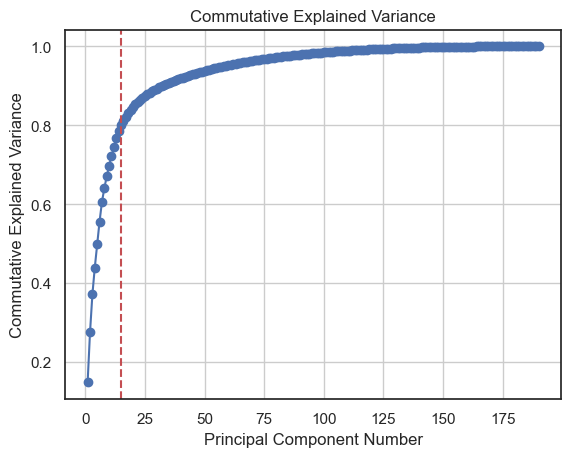

15 features explains 0.8 of the variance


In [874]:
# Apply PCA for dimensionality reduction
pca = PCA()
X_pca_iter= pca.fit_transform(df_train_iter)

# Print the explained variance ratio
explained_variances= pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variances)
principal_component_numbers = np.arange(1, len(explained_variances) + 1)
cumulative_var = np.cumsum(explained_variances)
threshold = 0.8


i_n_features =  np.argmax(cumulative_var >= threshold) +1

# Plot the commutative explained variance graph
plt.plot(principal_component_numbers, cumulative_var, marker='o')
plt.axvline(x=i_n_features, color = 'r', linestyle='--')
plt.xlabel('Principal Component Number')
plt.ylabel('Commutative Explained Variance')
plt.title('Commutative Explained Variance')
plt.grid(True)
plt.show()

print (f'{i_n_features} features explains {threshold} of the variance')

### Poly - top n features

Explained Variance Ratio: [1.51753915e-01 1.33750508e-01 1.01283322e-01 7.06516780e-02
 6.15817828e-02 5.91179670e-02 5.11043525e-02 3.56077385e-02
 3.16448597e-02 2.86386536e-02 2.39994949e-02 2.30906095e-02
 2.25331788e-02 2.05824819e-02 1.53504249e-02 9.84234393e-03
 9.48686589e-03 8.27338914e-03 6.95911521e-03 5.85128963e-03
 5.44411884e-03 5.05869595e-03 4.54284750e-03 4.12729093e-03
 3.73348338e-03 3.37592241e-03 3.23436159e-03 3.07523726e-03
 2.91312046e-03 2.79407500e-03 2.75097345e-03 2.54029000e-03
 2.36686971e-03 2.28795567e-03 2.26882551e-03 2.00303920e-03
 1.91994731e-03 1.87160417e-03 1.82019016e-03 1.78650237e-03
 1.70539408e-03 1.67497216e-03 1.66376403e-03 1.63447204e-03
 1.59755301e-03 1.58107668e-03 1.52137629e-03 1.47563876e-03
 1.43025201e-03 1.35407630e-03 1.34128446e-03 1.31397437e-03
 1.30330125e-03 1.25396747e-03 1.20462851e-03 1.14957113e-03
 1.12791334e-03 1.10473242e-03 1.09200229e-03 1.05320526e-03
 1.02170703e-03 1.00698741e-03 9.86599415e-04 9.43119184e-0

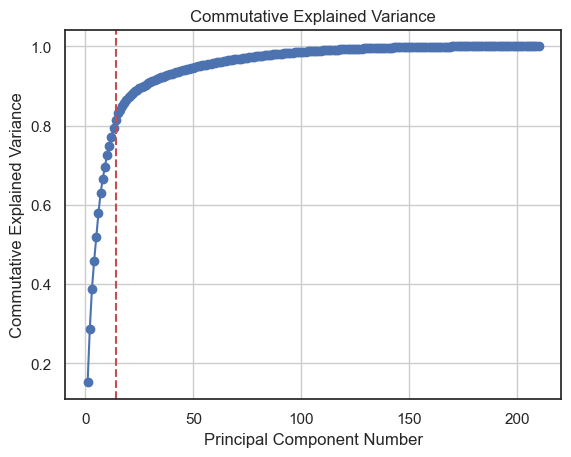

14 features explains 0.8 of the variance


In [875]:
# Apply PCA for dimensionality reduction
pca = PCA()
X_pca_poly= pca.fit_transform(df_train_poly)

# Print the explained variance ratio
explained_variances= pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variances)
principal_component_numbers = np.arange(1, len(explained_variances) + 1)
cumulative_var = np.cumsum(explained_variances)
threshold = 0.8


p_n_features =  np.argmax(cumulative_var >= threshold) +1

# Plot the commutative explained variance graph
plt.plot(principal_component_numbers, cumulative_var, marker='o')
plt.axvline(x=p_n_features, color = 'r', linestyle='--')
plt.xlabel('Principal Component Number')
plt.ylabel('Commutative Explained Variance')
plt.title('Commutative Explained Variance')
plt.grid(True)
plt.show()

print (f'{p_n_features} features explains {threshold} of the variance')

## Dimension Reduction

### Iter 

In [876]:
pca = PCA(n_components=i_n_features)  # Specify the desired number of components
pca_train_iter = pca.fit_transform(df_train_iter)
pca_test_iter = pca.fit_transform(df_test_iter)
df_i_train = pd.DataFrame(pca_train_iter)
df_i_test = pd.DataFrame(pca_test_iter)

### Poly 

In [877]:
pca = PCA(n_components=p_n_features)
pca_train_poly = pca.fit_transform(df_train_poly)
pca_test_poly = pca.fit_transform(df_test_poly)
df_p_train = pd.DataFrame(pca_train_poly)
df_p_test = pd.DataFrame(pca_test_poly)

In [878]:
df_i_train.describe().T

,count,mean,std,min,25%,50%,75%,max
0,8902.0,1.253148e-16,1.003447,-1.338184,-0.992888,-0.093958,0.592111,3.059812
1,8902.0,6.744649e-17,0.926172,-1.657974,-0.713368,-0.092317,0.475149,3.838224
2,8902.0,-3.947016e-16,0.807833,-1.992790,-0.486691,-0.087223,0.607428,3.229766
3,8902.0,6.864376e-17,0.678330,-1.907318,-0.374704,-0.007080,0.343025,2.753126
4,8902.0,-5.786829e-17,0.633559,-2.230816,-0.170672,0.012907,0.208866,2.788840
5,8902.0,-7.004058e-17,0.624636,-1.793898,-0.232147,-0.060005,0.127362,2.893893
6,8902.0,1.935594e-16,0.579021,-2.398512,-0.249720,-0.124885,0.368820,2.802198
7,8902.0,5.547374e-17,0.485506,-0.586492,-0.205135,-0.112274,-0.011610,2.413448
8,8902.0,-6.565057e-17,0.450899,-1.620300,-0.293350,-0.006844,0.296022,1.938520
9,8902.0,4.099669e-16,0.429466,-1.858181,-0.271540,-0.018889,0.228516,2.383229


In [879]:
df_p_train.describe().T

,count,mean,std,min,25%,50%,75%,max
0,8902.0,8.269179e-16,1.129348,-1.606290,-1.045354,-0.134865,0.835505,3.299740
1,8902.0,4.298217e-16,1.060244,-1.872468,-0.922888,-0.028076,0.576397,4.123317
2,8902.0,-9.767768e-17,0.922629,-2.188403,-0.574200,-0.097555,0.675278,3.654498
3,8902.0,8.979562e-16,0.770583,-2.180482,-0.383874,-0.008561,0.379769,3.010035
4,8902.0,-7.808228e-16,0.719423,-2.255739,-0.258440,-0.022531,0.232976,3.193193
5,8902.0,-1.101493e-16,0.704884,-1.949758,-0.248091,-0.078119,0.094566,3.154559
6,8902.0,-4.405972e-16,0.655370,-2.586483,-0.282782,-0.141263,0.425473,3.049089
7,8902.0,-3.619761e-16,0.547054,-0.742419,-0.248279,-0.124098,0.010533,2.599102
8,8902.0,-1.266717e-15,0.515715,-1.777733,-0.346709,-0.003503,0.353995,2.036899
9,8902.0,9.371669e-16,0.490608,-2.205257,-0.310455,-0.027118,0.272283,2.700487


## PART C- MODEL


In [880]:
y = df_scaled_train['respiratory_failure']
X_i = df_i_train
X_p = df_p_train
X_i_train, X_i_test, y_i_train, y_i_test = train_test_split(X_i, y, test_size=0.2, shuffle=True, random_state=42) # 80% training and 20% test
X_p_train, X_p_test, y_p_train, y_p_test = train_test_split(X_p, y, test_size=0.2, shuffle=True, random_state=42) # 80% training and 20% test

# KNN Model

### Iter 

In [882]:
# Define the parameter grid
param_grid_knn = {
    'n_neighbors': [3, 4, 5, 6, 7],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weighting scheme
    'p': [1, 2],  # Power parameter for the Minkowski distance metric
    'metric': ['euclidean', 'manhattan']
}
print('started fitting the model, please wait')
# Create the KNN classifier
KNN_clf = KNeighborsClassifier()

# Perform grid search with limited iterations
grid_search_knn= GridSearchCV(KNN_clf, param_grid_knn, cv=5, scoring='roc_auc')  ########### check iF ADD - scoring='roc_auc' ##############
grid_search_knn.fit(X_i, y)

# Get the best parameters and best score
best_params = grid_search_knn.best_params_
best_score = grid_search_knn.best_score_

# Train the model with the best parameters on the full training set
KNN_best = KNeighborsClassifier(**best_params)
KNN_best.fit(X_i_train, y_i_train)

# Make predictions on the scaled test data using the best model
KNN_y_pred = KNN_best.predict(X_i_test)


# Calculate the accuracy of the best model and Print the best parameters and best score
print("Best parameters: ", grid_search_knn.best_params_)
print("Best score: ", grid_search_knn.best_score_)
print("Accuracy: ", accuracy_score(y_i_test, KNN_y_pred))


started fitting the model, please wait
Best parameters:  {'metric': 'manhattan', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
Best score:  0.7418298437403644
Accuracy:  0.8483997754070747


### Poly 

In [883]:
# Define the parameter grid
param_grid_knn = {
    'n_neighbors': [3, 4, 5, 6, 7],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weighting scheme
    'p': [1, 2],  # Power parameter for the Minkowski distance metric
    'metric': ['euclidean', 'manhattan']
}
print('started fitting the model, please wait')
# Create the KNN classifier
KNN_clf = KNeighborsClassifier()

# Perform grid search with limited iterations
grid_search_knn= GridSearchCV(KNN_clf, param_grid_knn, cv=5, scoring='roc_auc')  ########### check iF ADD - scoring='roc_auc' ##############
grid_search_knn.fit(X_p, y)

# Get the best parameters and best score
best_params = grid_search_knn.best_params_
best_score = grid_search_knn.best_score_

# Train the model with the best parameters on the full training set
KNN_best = KNeighborsClassifier(**best_params)
KNN_best.fit(X_p_train, y_p_train)

# Make predictions on the scaled test data using the best model
KNN_y_pred = KNN_best.predict(X_p_test)


# Calculate the accuracy of the best model and Print the best parameters and best score
print("Best parameters: ", grid_search_knn.best_params_)
print("Best score: ", grid_search_knn.best_score_)
print("Accuracy: ", accuracy_score(y_p_test, KNN_y_pred))


started fitting the model, please wait
Best parameters:  {'metric': 'manhattan', 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
Best score:  0.7485204069925452
Accuracy:  0.8467153284671532


# Decision Tree

### Iter 

started fitting the model, please wait
Best parameters:  {'criterion': 'entropy', 'max_depth': 5, 'max_features': 0.5, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score:  0.7819456448444184
Accuracy:  0.8405390230207749


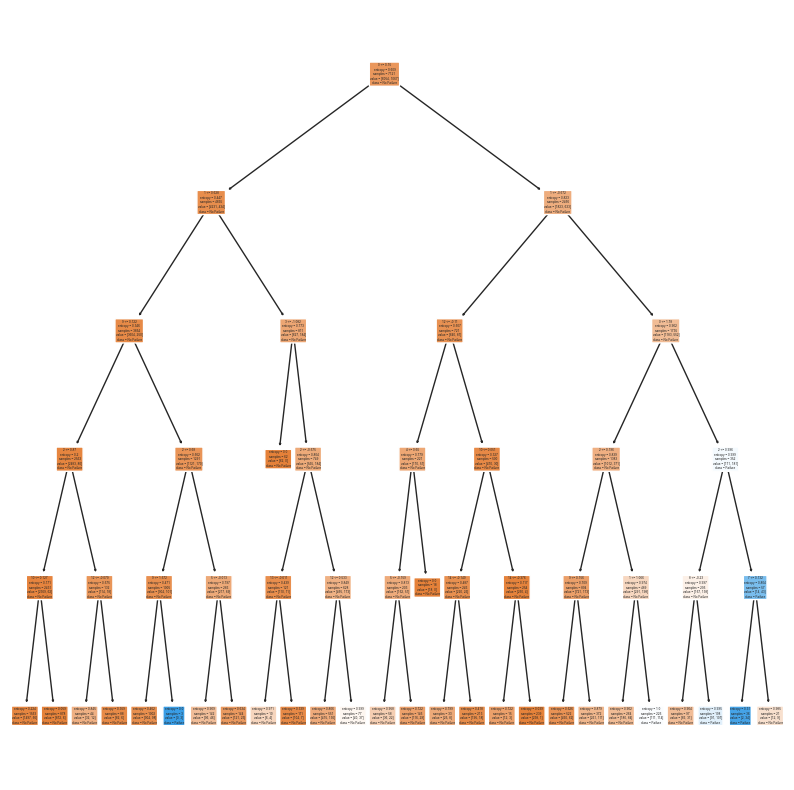

In [884]:

print('started fitting the model, please wait')
feature_names = X_i.columns.tolist()
param_grid_dt = {
    'criterion': ['gini', 'entropy'],  # Split quality criterion
    'max_depth': [None, 5, 10],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2', 0.5],
    'max_leaf_nodes': [None, 5, 10],

}

D_TREE_clf = DecisionTreeClassifier()
# D_TREE_clf = DecisionTreeClassifier(criterion='entropy',max_depth=None, min_samples_split=2)

# Perform grid search
grid_search_dt = GridSearchCV(D_TREE_clf, param_grid_dt, cv=5, scoring='roc_auc')
grid_search_dt.fit(X_i, y)
best_dt = grid_search_dt.best_estimator_

# Get the best parameters and best score
best_params = grid_search_dt.best_params_
best_score = grid_search_dt.best_score_

# Train the model with the best parameters on the full training set
best_dt = DecisionTreeClassifier(**best_params)
best_dt.fit(X_i_train, y_i_train)

# Make predictions on the scaled test data using the best model
DT_y_pred = best_dt.predict(X_i_test)

# Calculate the accuracy of the best model and Print the best parameters and best score
print("Best parameters: ", grid_search_dt.best_params_)
print("Best score: ", grid_search_dt.best_score_)
print("Accuracy: ", accuracy_score(y_i_test, DT_y_pred))

#plot Decision Tree
plt.figure(figsize=(10, 10))  # Adjust the figure size as needed
plot_tree(best_dt, feature_names=feature_names, class_names=['No Failure', 'Failure'], filled=True, rounded=True)
plt.show()

### Poly 

started fitting the model, please wait
Best parameters:  {'criterion': 'entropy', 'max_depth': 5, 'max_features': 0.5, 'max_leaf_nodes': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best score:  0.797986240185214
Accuracy:  0.8472768107804605


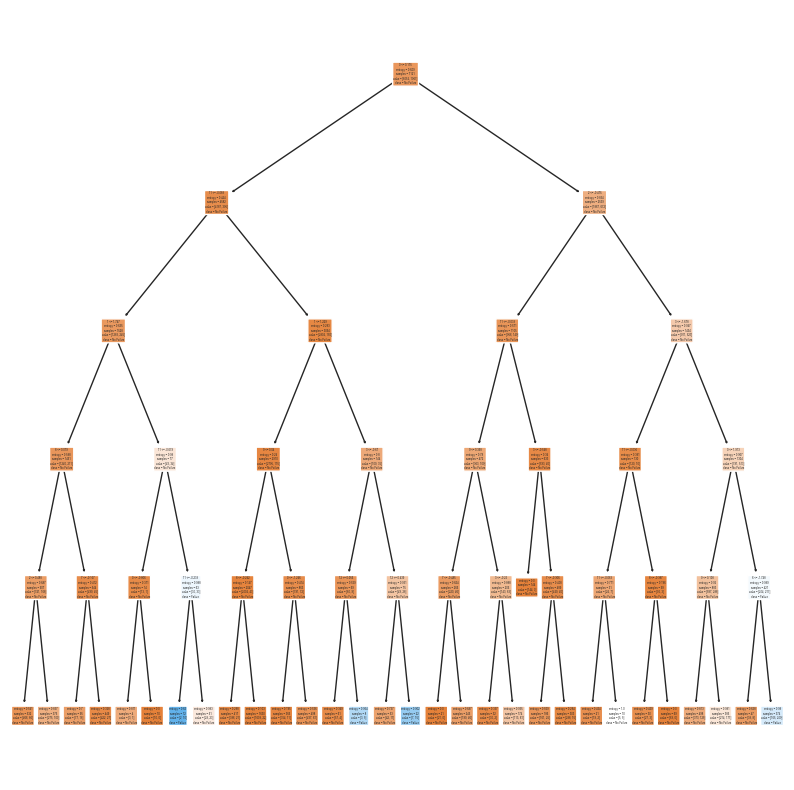

In [885]:

print('started fitting the model, please wait')
feature_names = X_p.columns.tolist()
param_grid_dt = {
    'criterion': ['gini', 'entropy'],  # Split quality criterion
    'max_depth': [None, 5, 10],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2', 0.5],
    'max_leaf_nodes': [None, 5, 10],

}

D_TREE_clf = DecisionTreeClassifier()
# D_TREE_clf = DecisionTreeClassifier(criterion='entropy',max_depth=None, min_samples_split=2)

# Perform grid search
grid_search_dt = GridSearchCV(D_TREE_clf, param_grid_dt, cv=5, scoring='roc_auc')
grid_search_dt.fit(X_p, y)
best_dt = grid_search_dt.best_estimator_

# Get the best parameters and best score
best_params = grid_search_dt.best_params_
best_score = grid_search_dt.best_score_

# Train the model with the best parameters on the full training set
best_dt = DecisionTreeClassifier(**best_params)
best_dt.fit(X_p_train, y_p_train)

# Make predictions on the scaled test data using the best model
DT_y_pred = best_dt.predict(X_p_test)

# Calculate the accuracy of the best model and Print the best parameters and best score
print("Best parameters: ", grid_search_dt.best_params_)
print("Best score: ", grid_search_dt.best_score_)
print("Accuracy: ", accuracy_score(y_p_test, DT_y_pred))

#plot Decision Tree
plt.figure(figsize=(10, 10))  # Adjust the figure size as needed
plot_tree(best_dt, feature_names=feature_names, class_names=['No Failure', 'Failure'], filled=True, rounded=True)
plt.show()

#### It seemed the polynomial did a better work - from now on, we will use it's results for our models 

# Support Vectors Machine

In [886]:
print('started fitting the model, please wait')
param_grid_svm = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 10]
}

# Create the classifier instance
clf_svm = svm.SVC()

# Perform grid search with cross-validation
grid_search_svm = GridSearchCV(clf_svm, param_grid_svm, cv=5, scoring='roc_auc')
grid_search_svm.fit(X_p, y)

# Get the best parameters and best score
best_params = grid_search_svm.best_params_
best_score = grid_search_svm.best_score_

# Train the model with the best parameters on the full training set
SVM_best = svm.SVC(probability=True, **best_params)
SVM_best.fit(X_p_train, y_p_train)

# Make predictions on the scaled test data using the best model
SVM_y_pred = SVM_best.predict(X_p_test)


# Calculate the accuracy of the best model and Print the best parameters and best score
print("Best parameters: ", grid_search_svm.best_params_)
print("Best score: ", grid_search_svm.best_score_)
print("Accuracy: ", accuracy_score(y_p_test, SVM_y_pred))


started fitting the model, please wait
Best parameters:  {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
Best score:  0.7852405606294234
Accuracy:  0.8495227400336889


# Multi-Layer Perceptron (ANN)

In [887]:
print('started fitting the model, please wait')
from sklearn.preprocessing import label_binarize
param_grid_ANN = {'activation' : ["logistic", "relu"], #
                      'hidden_layer_sizes' : [(100,), # 1 large hidden layer
                                             (50, 50), # 2 medium size layers
                                             (20, 20, 10, 10, 10)], # multiple small sized layers
                      'batch_size' : [10, 50],
                      'learning_rate_init' : [0.1, 0.01], #In some of the runs we saw that the network got stuck on a local min, for this reason we enlearge the defualt momentum
                      'max_iter' : [5000]} 

ANN_clf = MLPClassifier()
grid_search_ANN = GridSearchCV(ANN_clf, param_grid_ANN, cv=3, scoring='roc_auc')
grid_search_ANN.fit(X_p, y)

# Get the best parameters and best score
best_params = grid_search_ANN.best_params_
best_score = grid_search_ANN.best_score_

# Train the model with the best parameters on the full training set
ANN_best = MLPClassifier(**best_params)
ANN_best.fit(X_p_train, y_p_train)

# Make predictions on the scaled test data using the best model
ANN_y_pred = ANN_best.predict(X_p_test)

# Print the best parameters and best score
print("Best parameters: ", grid_search_ANN.best_params_)
print("Best score: ", grid_search_ANN.best_score_)
print("Accuracy: ", accuracy_score(y_p_test, ANN_y_pred))

started fitting the model, please wait
Best parameters:  {'activation': 'logistic', 'batch_size': 10, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.1, 'max_iter': 5000}
Best score:  0.8222775879093017
Accuracy:  0.8483997754070747


# Part D

## Confusion Matrix

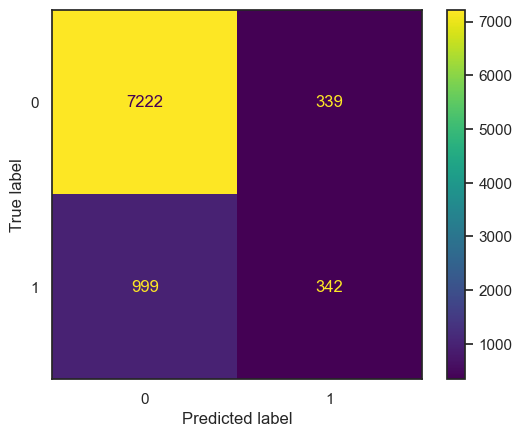

In [891]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
best_ANN = grid_search_ANN.best_estimator_
# ANN_y_pred = best_ANN.predict(X_p_test)
# accuracy = accuracy_score(y_p_test, ANN_y_pred)
y_pred = cross_val_predict(best_ANN, X_p, y, cv=5)
# cm = confusion_matrix(y_p_test, ANN_y_pred, labels=best_ANN.classes_)
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_ANN.classes_)
disp.plot()

##### The evaluation matrix highlights the model's proficiency in distinguishing healthy individuals but demonstrates its limitations in identifying sick individuals accurately. Recognizing the severity of misclassifying a sick person, which has more serious consequences compared to misclassifying a healthy person, we present a refined model that addresses this concern by implementing a tailored punishment mechanism 

## Logistic Regression model with different weight punishment for FN mistake

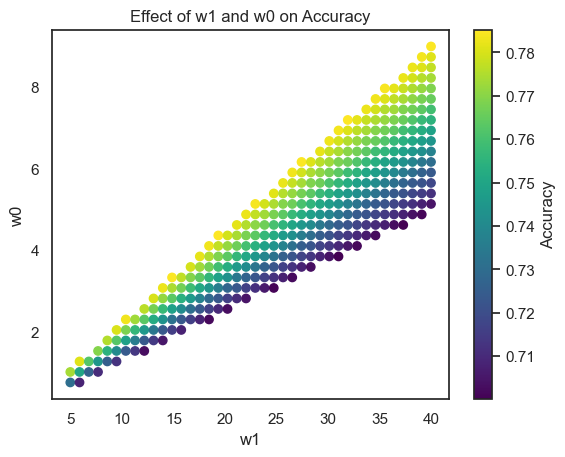

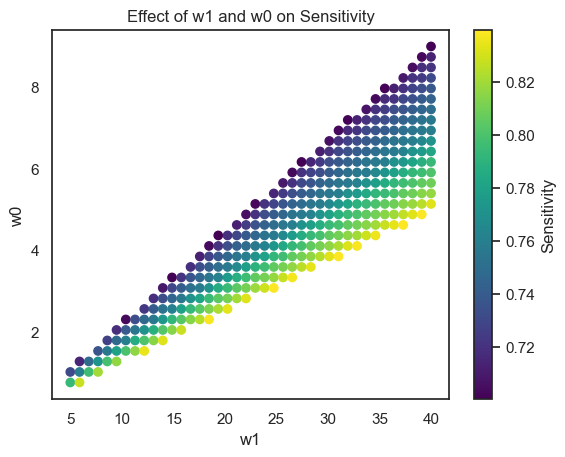

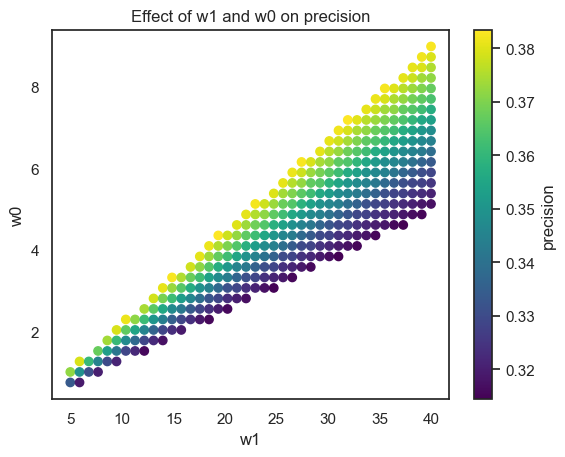

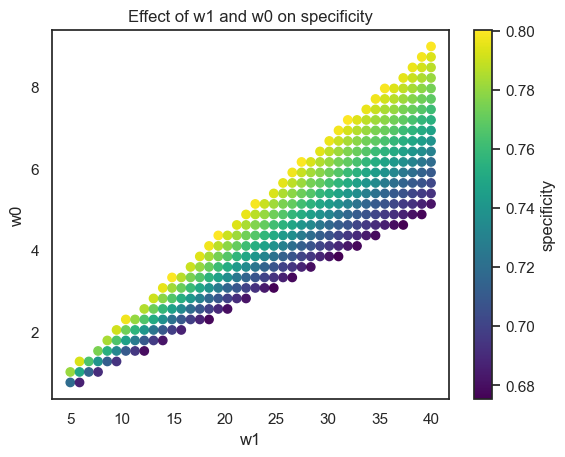

Optimal Weight Combination:
w_1: 19.358974358974358
w_0: 4.358974358974359
Sensitivity: 0.7002237136465325
Accuracy: 0.7852168052123119
Precision: 0.3834218048182932
Specificity: 0.8002909668033329


In [896]:
from sklearn.model_selection import cross_val_predict
def generate_numbers(lower_limit, upper_limit, total_numbers):
    gap = (upper_limit - lower_limit) / (total_numbers - 1)
    numbers = [lower_limit + i * gap for i in range(total_numbers)]
    return numbers

# Generating weight ranges
w_1_range = generate_numbers(5, 40 , 40)
w_0_range = generate_numbers(0, 10, 40)

sensitivity_values = []
accuracy_values = []
precision_values = []
specificity_values = []
w1_values = []
w0_values = []

# Define and train the model
for w_1 in w_1_range:
    for w_0 in w_0_range:
        # Calculate class weights
        class_weights = {0: w_0, 1: w_1}
        
        # Create the logistic regression model with class weights
        model = LogisticRegression(class_weight=class_weights)

        # Perform cross-validation and obtain predicted labels
        y_pred = cross_val_predict(model, X_p, y, cv=5)


        # Compute the confusion matrix
        cm = confusion_matrix(y, y_pred)

        # Calculate evaluation metrics
        TN = cm[0, 0]
        FP = cm[0, 1]
        FN = cm[1, 0]
        TP = cm[1, 1]
        accuracy = (TP + TN) / (TP + TN + FP + FN)
        sensitivity = TP / (TP + FN)
        precision = TP / (TP + FP)
        specificity = TN / (TN + FP)
        if accuracy > 0.7 and sensitivity > 0.7:
            sensitivity_values.append(sensitivity)
            accuracy_values.append(accuracy)
            precision_values.append(precision)
            specificity_values.append(specificity)
            w1_values.append(w_1)
            w0_values.append(w_0)

plt.scatter(w1_values, w0_values, c= accuracy_values, cmap='viridis')
plt.colorbar(label='Accuracy')
plt.xlabel('w1')
plt.ylabel('w0')
plt.title('Effect of w1 and w0 on Accuracy')
plt.show()

plt.scatter(w1_values, w0_values, c= sensitivity_values, cmap='viridis')
plt.colorbar(label='Sensitivity')
plt.xlabel('w1')
plt.ylabel('w0')
plt.title('Effect of w1 and w0 on Sensitivity')
plt.show()

plt.scatter(w1_values, w0_values, c= precision_values, cmap='viridis')
plt.colorbar(label='precision')
plt.xlabel('w1')
plt.ylabel('w0')
plt.title('Effect of w1 and w0 on precision')
plt.show()

plt.scatter(w1_values, w0_values, c= specificity_values , cmap='viridis')
plt.colorbar(label='specificity')
plt.xlabel('w1')
plt.ylabel('w0')
plt.title('Effect of w1 and w0 on specificity')
plt.show()

# Convert lists to NumPy arrays
precision_values = np.array(precision_values)
accuracy_values = np.array(accuracy_values)
specificity_values = np.array(specificity_values)
sensitivity_values = np.array(sensitivity_values)

# Find the index of the optimal weight combination based on sensitivity/accuracy ratio
optimal_index = np.argmax(specificity_values * accuracy_values * precision_values * specificity_values)

# Get the optimal weight values and corresponding metrics
optimal_w1 = w1_values[optimal_index]
optimal_w0 = w0_values[optimal_index]
optimal_sensitivity = sensitivity_values[optimal_index]
optimal_accuracy = accuracy_values[optimal_index]
optimal_precision = precision_values[optimal_index]
optimal_specificity = specificity_values[optimal_index]

print("Optimal Weight Combination:")
print("w_1:", optimal_w1)
print("w_0:", optimal_w0)
print("Sensitivity:", optimal_sensitivity)
print("Accuracy:", optimal_accuracy)
print("Precision:", optimal_precision)
print("Specificity:", optimal_specificity)

## Seems like w1 = 19.35 and w0 = 4.35 could lead to a good model for our matter.

accuracy: 0.7852168052123119
sensitivity: 0.7002237136465325
precision: 0.3834218048182932
specificity: 0.8002909668033329


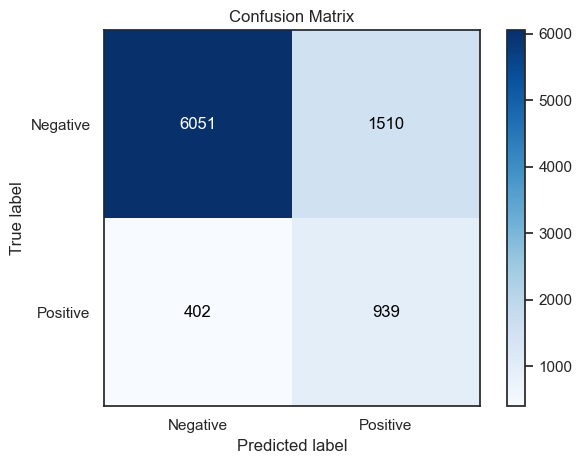

In [897]:
class_weights = {0:optimal_w0, 1: optimal_w1}  # Adjust the weights as per your requirement
model = LogisticRegression(class_weight=class_weights)
# Create the logistic regression model with class weights
model = LogisticRegression(class_weight=class_weights)

# Perform cross-validation and obtain predicted labels
y_pred = cross_val_predict(model, X_p, y, cv=5)


# Compute the confusion matrix
cm = confusion_matrix(y, y_pred)
# Calculate evaluation metrics
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]
accuracy = (TP + TN) / (TP + TN + FP + FN)
sensitivity = TP / (TP + FN)
precision = TP / (TP + FP)
specificity = TN / (TN + FP)

print(f'accuracy: {accuracy}')
print(f'sensitivity: {sensitivity}')
print(f'precision: {precision}')
print(f'specificity: {specificity}')

def plot_confusion_matrix(TN, FP, FN, TP):
    cm = np.array([[TN, FP], [FN, TP]])

    plt.imshow(cm, cmap='Blues', interpolation='nearest')
    plt.title('Confusion Matrix')
    plt.colorbar()

    classes = ['Negative', 'Positive']
    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2

    for i in range(2):
        for j in range(2):
            plt.text(j, i, format(cm[i, j], 'd'),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    plt.tight_layout()
    plt.show()

# Plot the confusion matrix
plot_confusion_matrix(TN, FP, FN, TP)


# K-Fold + ROC

In [898]:
def KfoldPlot(X, y, clf, k):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    mean_fpr = np.linspace(0, 1, 100)
    tprs = []
    aucs = []

#     for train_index, test_index in kf.split(X):
    for i, (train_index, test_index) in enumerate(kf.split(X)):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        y_train = y_train.astype(int)
        
        # Convert test labels to binary format if necessary
        label_encoder = LabelEncoder()
        y_test_binary = label_encoder.fit_transform(y_test)

        clf.fit(X_train, y_train)
        y_score = clf.predict_proba(X_test)[:, 1]

        fpr, tpr, thresholds = roc_curve(y_test_binary, y_score)
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)

        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)

        plt.plot(fpr, tpr, lw=1, alpha=0.3,  label='Fold %d (AUC = %0.2f)' % (i + 1, roc_auc))
#         plt.plot(fpr, tpr, lw=1, alpha=0.3)

    mean_tpr = np.mean(tprs, axis=0)
    mean_auc = auc(mean_fpr, mean_tpr)

    plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean ROC (AUC = {mean_auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

# KNN

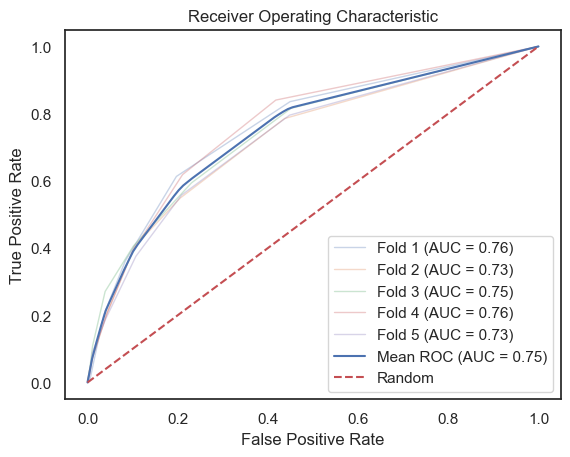

In [899]:
KfoldPlot(X_p.values, y.values, KNN_best, k=5)

# Decision Tree

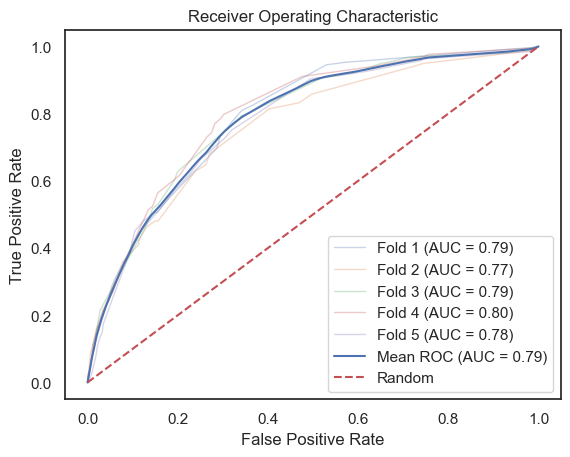

In [900]:
KfoldPlot(X_p.values, y.values, best_dt, k=5)

# Support Vectors Machine

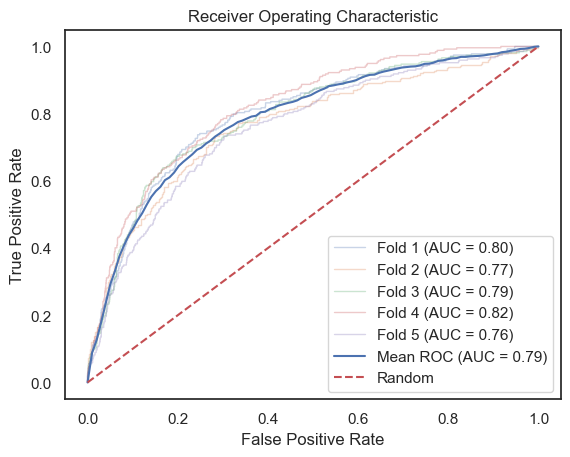

In [901]:
KfoldPlot(X_p.values, y.values, SVM_best, k=5)

# Multi-Layer Perceptron (ANN)

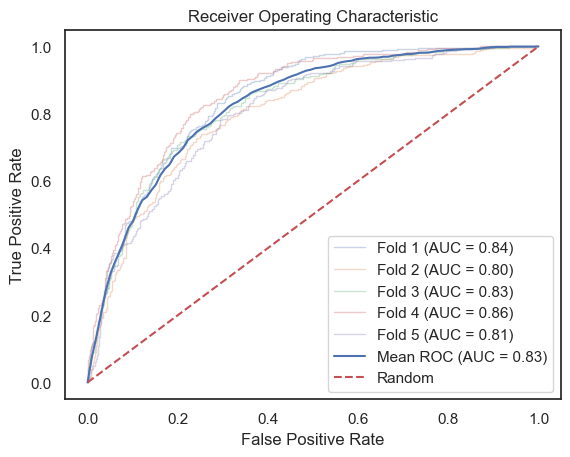

In [902]:
KfoldPlot(X_p.values, y.values, ANN_best, k=5)

# Logistic Regression with specific weights

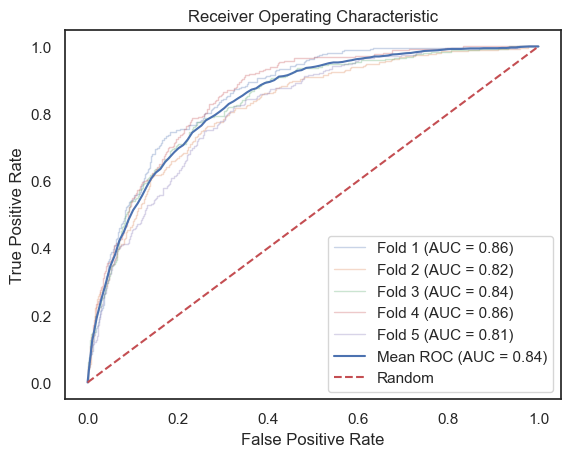

In [903]:
KfoldPlot(X_p.values, y.values, model, k=5)

# Prediction

In [904]:
# train the model with the trin & val df and predict the test df

ANN_best.fit(X_p, y)

probabilities = ANN_best.predict_proba(df_p_test)

prob_positive = probabilities[:, 1]

# Create an 'id' range starting from 0
id_range = range(0, len(prob_positive))

df = pd.DataFrame({
    'id': id_range, 
    'predict_prob': prob_positive
})

df.to_csv('group12.csv', index=False)